In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Structure generation Method

## Table 5.2 Lattice Constant




W Lattice Constant (Å) for three methods

                            DFT      MACE MP0    ACE-MD    ACE-RRR     ACE-RVD
_______
    Lattice Constant (Å)    3.185      3.188      3.114      3.191       3.190




## Figure 5.1 Cubic elastic constants

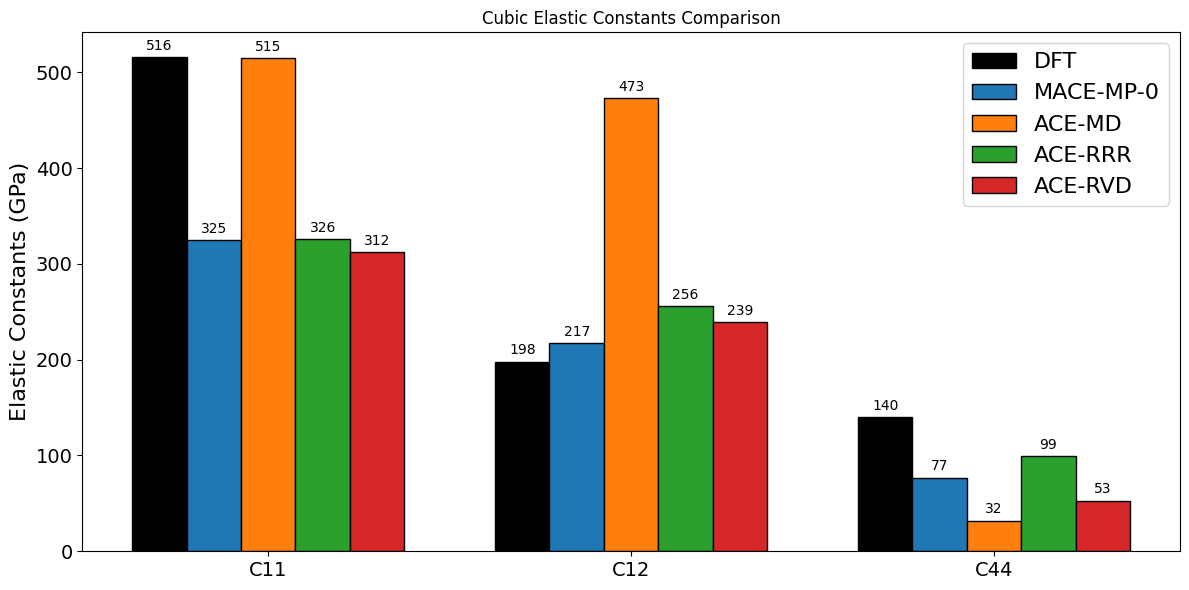

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "ACE-MD", "ACE-RRR", "ACE-RVD"]

C11 = [516.0, 325.0, 515.0, 326.0, 312.0]
C12 = [198.0, 217.0, 473.0, 256.0, 239.0]
C44 = [140.0, 77.0, 32.0, 99, 53.0]

constants = ["C11", "C12", "C44"]
data = np.array([C11, C12, C44])  # shape (3, 5)

colors = {
    "DFT": "black",
    "MACE-MP-0": "tab:blue",
    "ACE-MD": "tab:orange",
    "ACE-RRR": "tab:green",
    "ACE-RVD": "tab:red"
}

# X positions (groups = constants)
x = np.arange(len(constants))
width = 0.15  # narrower bars since many models

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars: shift each model within the group
for i, model in enumerate(models):
    ax.bar(
        x + (i - len(models)/2)*width + width/2,
        data[:, i],
        width,
        label=model,
        edgecolor="black",
        color=colors[model]
    )

# Labels and ticks
ax.set_ylabel("Elastic Constants (GPa)", fontsize=16)
ax.set_title("Cubic Elastic Constants Comparison")
ax.set_xticks(x)
ax.set_xticklabels(constants, fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=16)

# Annotate values
def autolabel():
    for i in range(len(models)):
        for j in range(len(constants)):
            val = data[j, i]
            xpos = x[j] + (i - len(models)/2)*width + width/2
            ax.annotate(f'{val:.0f}',
                        xy=(xpos, val),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel()

plt.tight_layout()
plt.savefig("./Structure_generation_methods_data/cubic_constants.png", dpi=300)
plt.show()


## Figure 5.2 ΔE-V

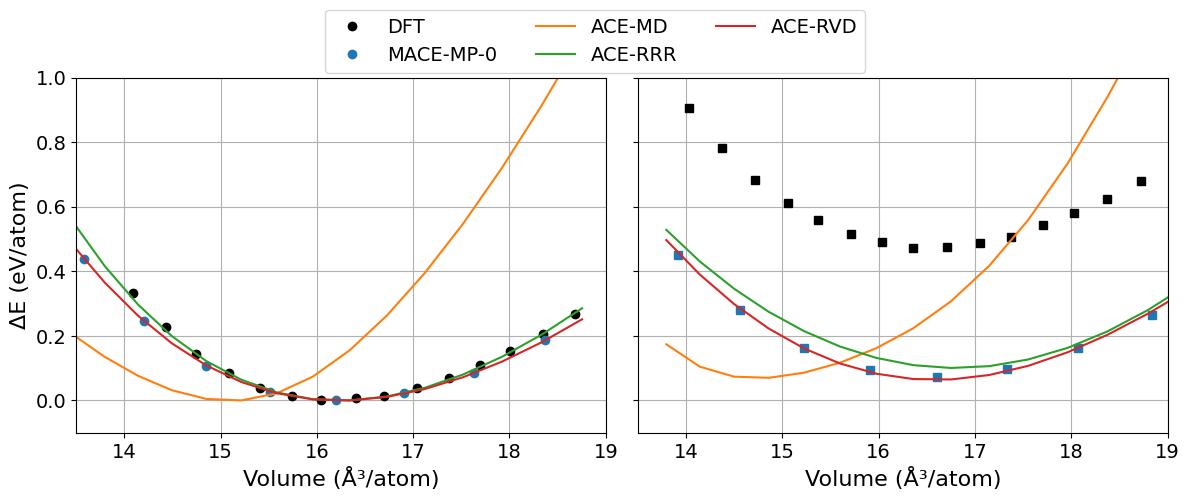

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Settings
# -----------------------------
files = [
    "./Structure_generation_methods_data/DeltaE_vs_V_W_DFT.csv",
    "./Structure_generation_methods_data/DeltaE_vs_V_W_MACE_MP_0.csv",
    "./Structure_generation_methods_data/DeltaE_vs_V_W_W_Dataset_order4_totaldegree9_rcut4.5_md_tungsten_bulk_N16_steps1500000_interval500_Tmix_W_3.188_bcc_training_data_176strs.csv",
    "./Structure_generation_methods_data/DeltaE_vs_V_W_W_Dataset_order4_totaldegree9_rcut4.5_RRR_synthetic_structures_of_evwindow&vacancy250relaxed_npr5_T300_beta0.2_sig0.010.1_mf30_ms0.5_mr20_nonparents.csv",
    "./Structure_generation_methods_data/DeltaE_vs_V_W_W_Dataset_order4_totaldegree9_rcut4.5_random_disp_aug_of_evwindowbccfcc_m2_delta0.4&of_relaxedvacancy250_withoutLatt3.188.csv"
]


models = ["DFT","MACE-MP-0" , "ACE-MD", "ACE-RRR", "ACE-RVD"]

# Define consistent colors (teachers + students same color)
colors = {
    "DFT": "black",
    "MACE-MP-0": "tab:blue",
    "ACE-MD": "tab:orange",
    "ACE-RRR": "tab:green",
    "ACE-RVD": "tab:red"
}

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- BCC ----
for i, (file, model) in enumerate(zip(files, models)):
    df = pd.read_csv(file)
    if i < 2:  # first three models = markers only
        axes[0].plot(df["V_BCC"], df["DeltaE_BCC"],
                     marker='o', linestyle='None', color=colors[model], label=model)
    else:      # last three models = line
        axes[0].plot(df["V_BCC"], df["DeltaE_BCC"],
                     linestyle='-', color=colors[model], label=model)

axes[0].set_xlabel("Volume (Å³/atom)", fontsize=16)
axes[0].set_ylabel("ΔE (eV/atom)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xlim(13.5, 19)
axes[0].set_ylim(-0.1, 1)
axes[0].grid(True)

# ---- FCC ----
for i, (file, model) in enumerate(zip(files, models)):
    df = pd.read_csv(file)
    if i < 2:  # first three models = markers only
        axes[1].plot(df["V_FCC"], df["DeltaE_FCC"],
                     marker='s', linestyle='None', color=colors[model], label=model)
    else:      # last three models = line
        axes[1].plot(df["V_FCC"], df["DeltaE_FCC"],
                     linestyle='-', color=colors[model], label=model)

axes[1].set_xlabel("Volume (Å³/atom)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

axes[1].set_xlim(13.5, 19)
axes[1].grid(True)

# Shared legend
fig.legend(models, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.01), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig("./Structure_generation_methods_data/DeltaE_vs_V_W_Comparison.png", dpi=300)
plt.show()


## Figure 5.3 Vacancy formation energy

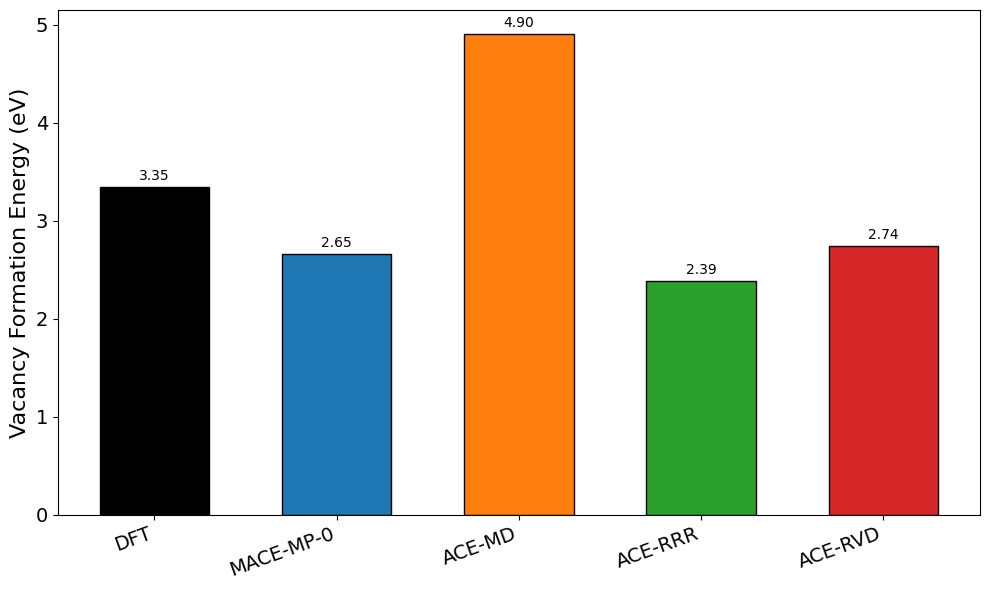

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT","MACE-MP-0", "ACE-MD", "ACE-RRR", "ACE-RVD"]


vacancy_energies = [3.345, 2.655, 4.904, 2.386, 2.743]  # eV

# Assign colors: teachers and students share colors
colors = {
    "DFT": "black",
    "MACE-MP-0": "tab:blue",
    "ACE-MD": "tab:orange",
    "ACE-RRR": "tab:green",
    "ACE-RVD": "tab:red"
}

x = np.arange(len(models))
width = 0.6

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, vacancy_energies, width,
              color=[colors[m] for m in models], edgecolor="black")

# Labels and ticks
ax.set_ylabel("Vacancy Formation Energy (eV)", fontsize=16)
#ax.set_title("Vacancy Formation Energy Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha="right")
ax.tick_params(axis='both', which='major', labelsize=14)

# Annotate values
for bar, val in zip(bars, vacancy_energies):
    height = bar.get_height()
    ax.annotate(f"{val:.2f}",
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig("./Structure_generation_methods_data/vacancy_formation_energy.png", dpi=300)
plt.show()

# Hyperparameters and dataset size effects

### Figure 5.4 Lattice constant

/tmp/ipython-input-4213334731.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


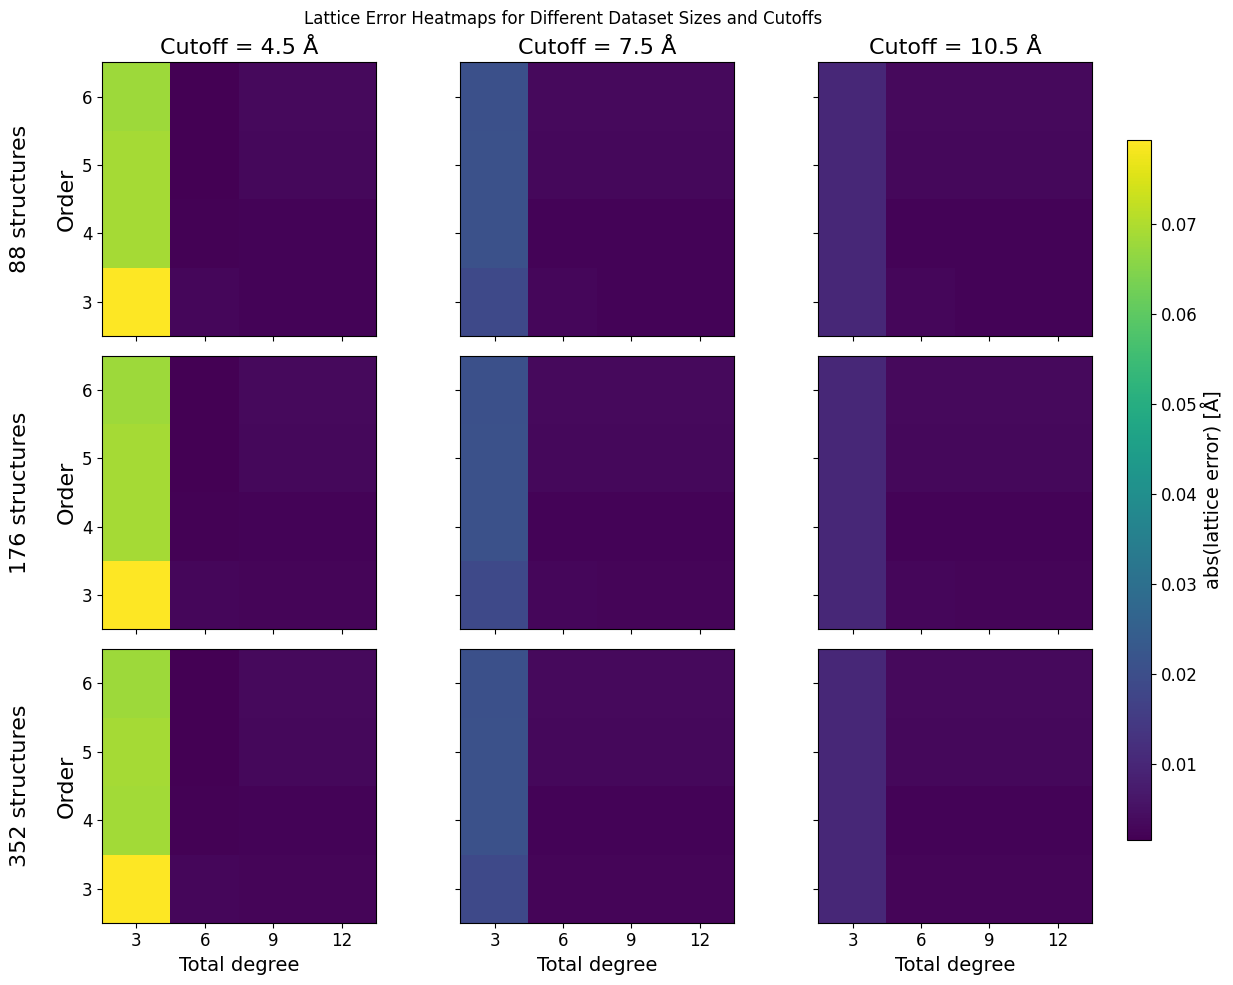

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Load the datasets
# ============================
df_88  = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Lattice_constant_RVD_88structures.csv")
df_176 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Lattice_constant_RVD_176structures.csv")
df_352 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Lattice_constant_RVD_352structures.csv")

# ============================
# Settings
# ============================
ref_lattice = 3.188
datasets = {
    "88 structures": df_88,
    "176 structures": df_176,
    "352 structures": df_352
}
cutoffs = [4.5, 7.5, 10.5]

# Compute absolute error
for df in datasets.values():
    df["error"] = np.abs(df["Lattice Constant"] + ref_lattice)

# Identify sorted axes for heatmap layout
orders = sorted(df_88["order"].unique())
degrees = sorted(df_88["totaldegree"].unique())

# ============================
# Create 3x3 subplot heatmaps
# ============================
fig, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)

# colormap range (consistent scale across all heatmaps)
vmin = min(df["error"].min() for df in datasets.values())
vmax = max(df["error"].max() for df in datasets.values())

for row, (title, df) in enumerate(datasets.items()):
    for col, rcut in enumerate(cutoffs):
        ax = axes[row][col]
        pivot = df[df["rcut"] == rcut].pivot(index="order", columns="totaldegree", values="error")
        im = ax.imshow(pivot.values, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)

        # labels
        if row == 0:
            ax.set_title(f"Cutoff = {rcut} Å", fontsize=16)
        if col == 0:
            ax.set_ylabel(f"{title}\n\nOrder", fontsize=16)
        if row == 2:
            ax.set_xlabel("Total degree", fontsize=14)

        ax.set_xticks(range(len(degrees)))
        ax.set_xticklabels(degrees)
        ax.set_yticks(range(len(orders)))
        ax.set_yticklabels(orders)
        ax.tick_params(axis='both', which='major', labelsize=12)

# ============================
# One shared colorbar
# ============================

from mpl_toolkits.axes_grid1 import make_axes_locatable

cbar_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("abs(lattice error) [Å]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.suptitle("Lattice Error Heatmaps for Different Dataset Sizes and Cutoffs")
plt.tight_layout()
plt.savefig("./Hyperparameter_and_dataset_size_effects/lattice_error_heatmaps.png", dpi=300, bbox_inches="tight")
plt.show()


### E-V

#### Figures A1-A4 (88 Structures)

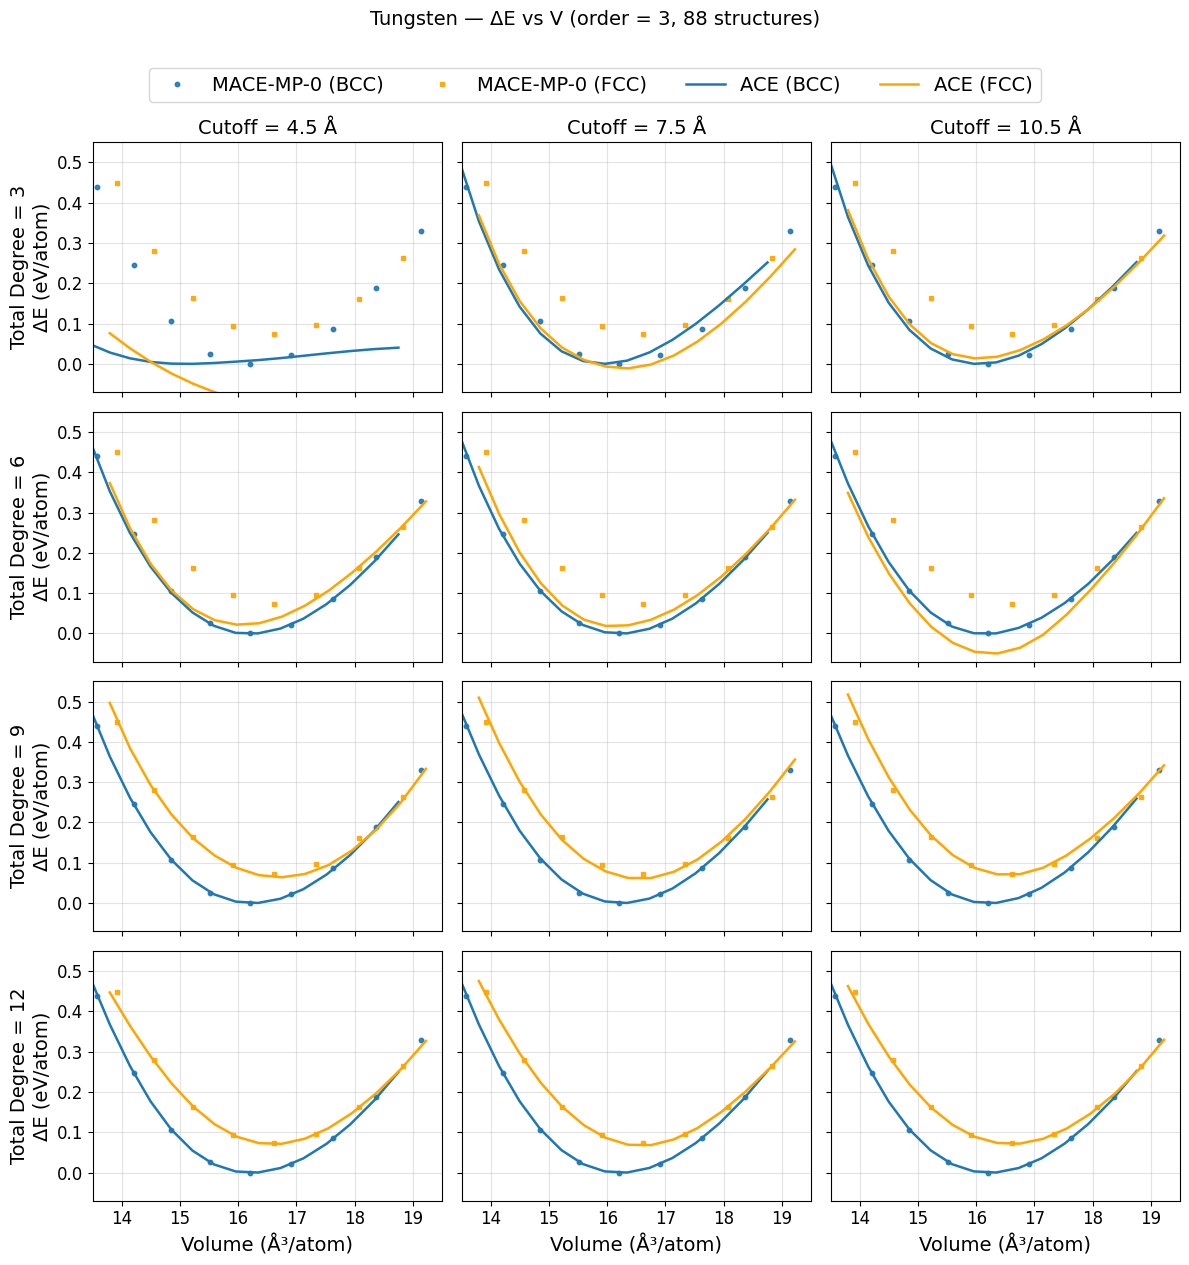

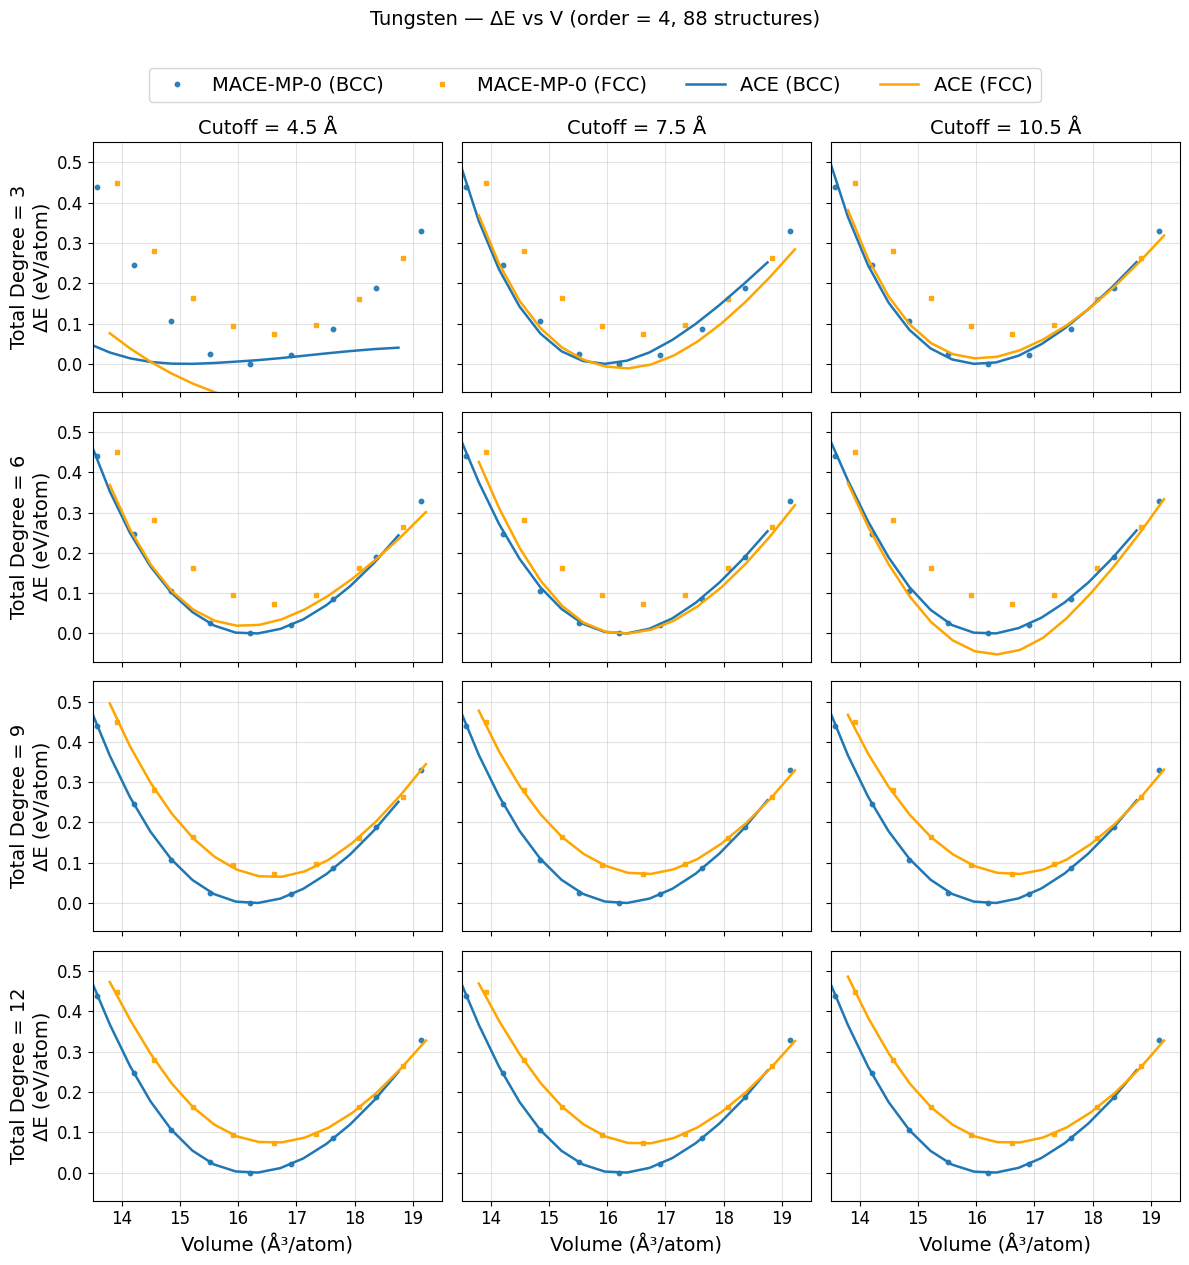

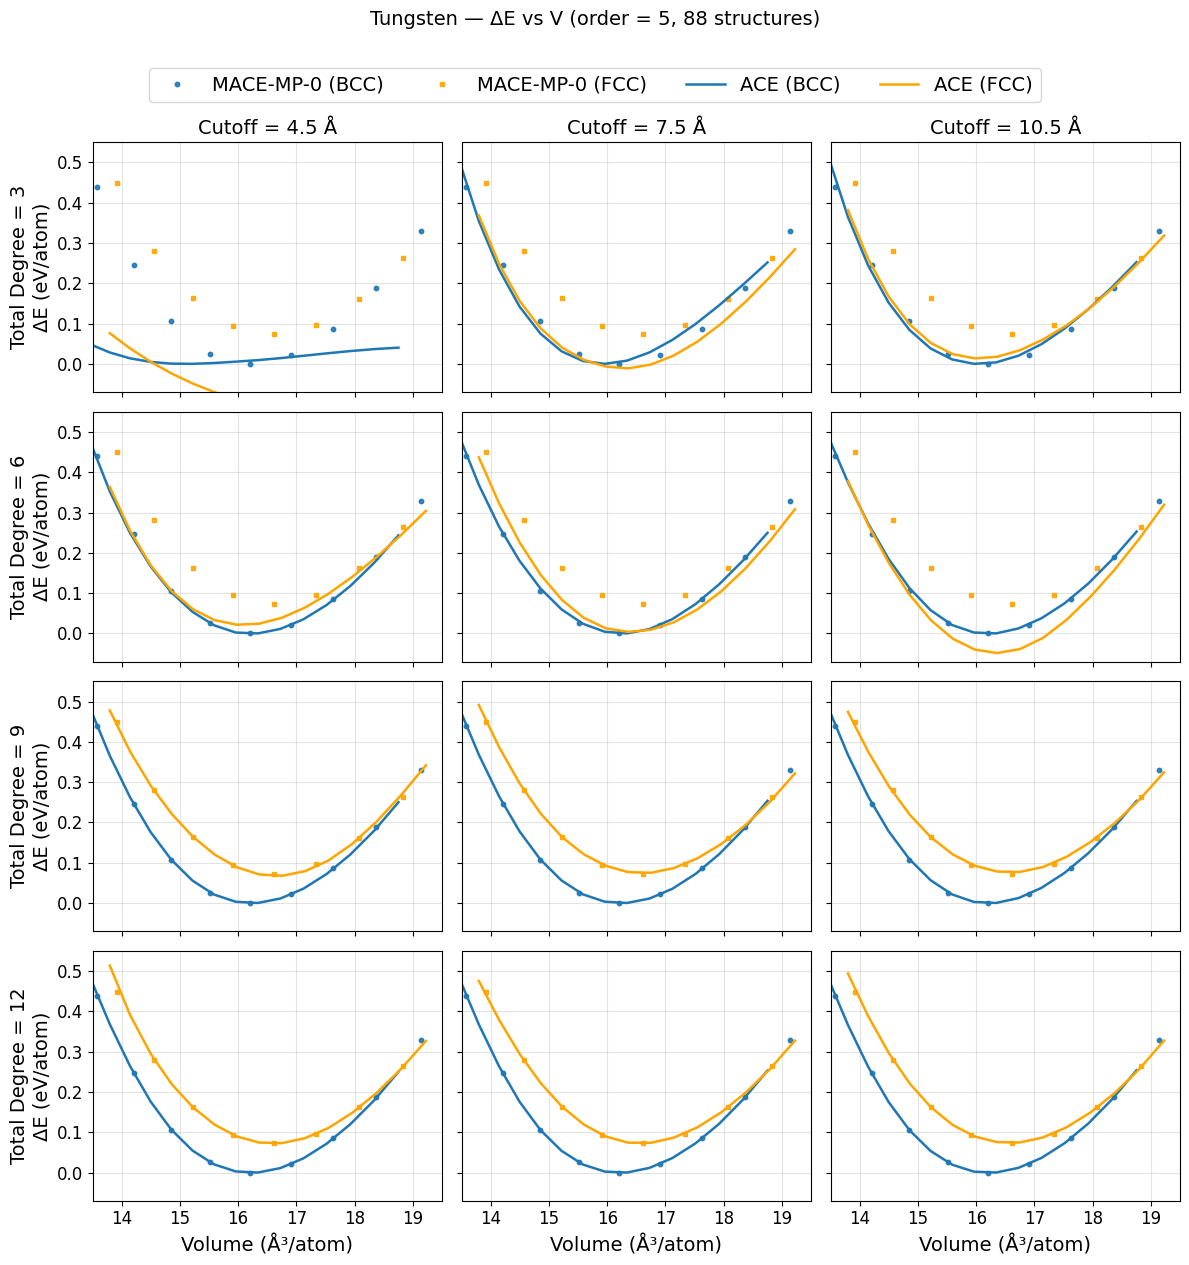

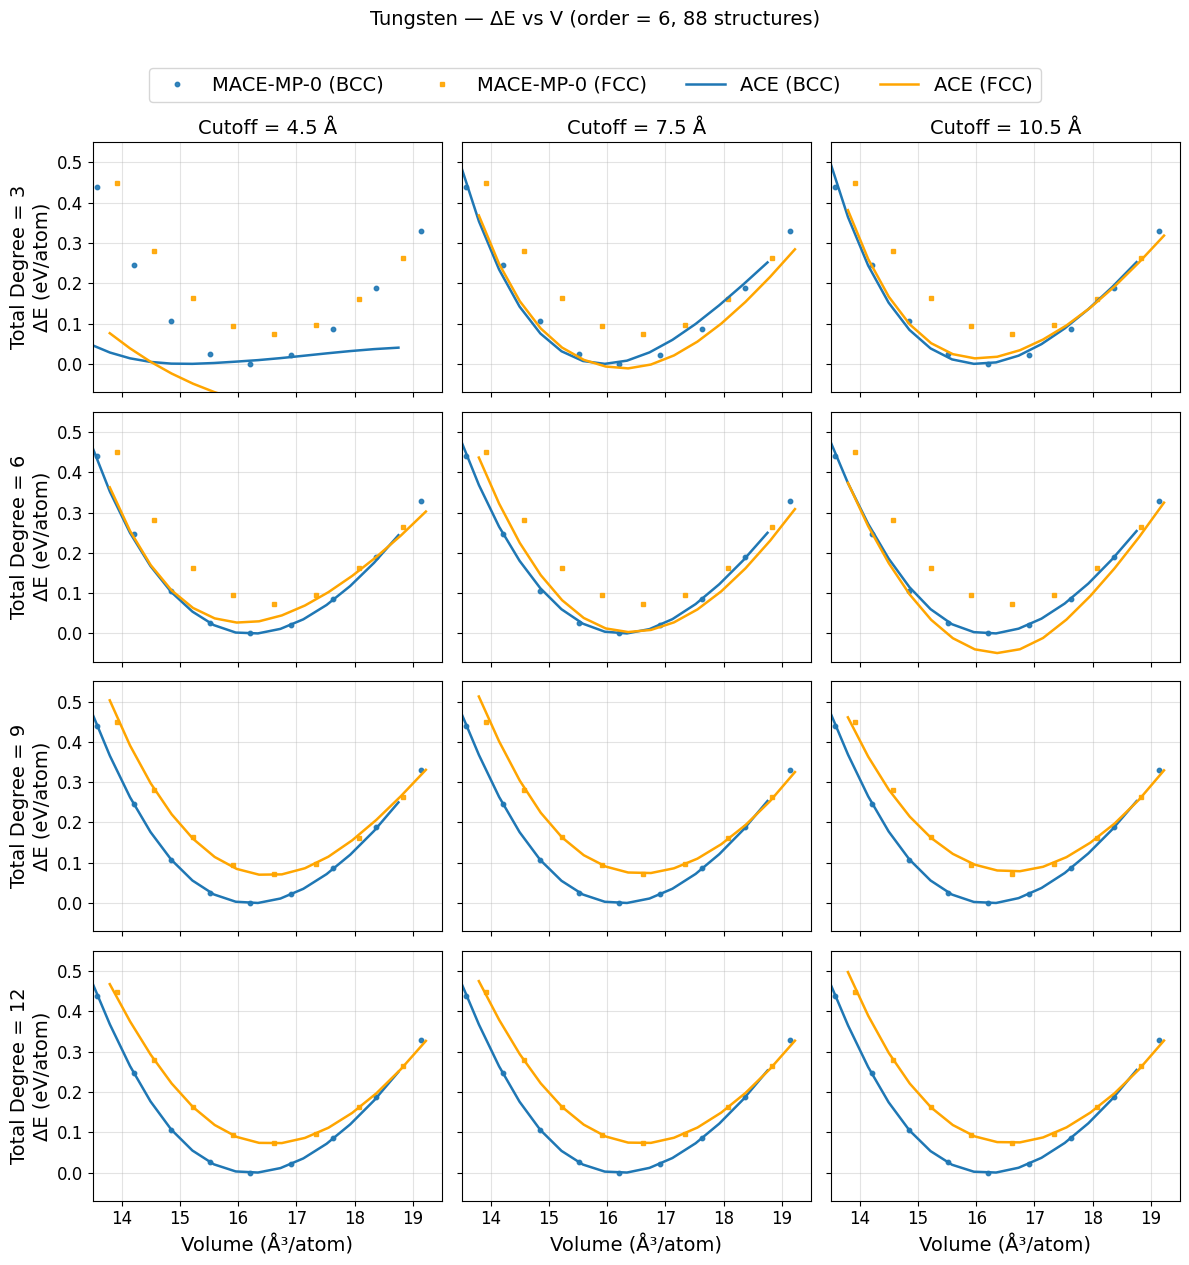

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
base_dir = "E-V curve/results of models on on RVD dataset/m2_delta0.4_88strs"   # folder containing all CSV files

orders        = [3, 4, 5, 6]          # 4 figures
totaldegrees  = [3, 6, 9, 12]         # 4 subplot rows
rcuts         = [4.5, 7.5, 10.5]      # 3 subplot columns

# Filename pattern
student_pattern = (
    "DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m2_delta0.4&of_relaxedvacancy250_withoutLatt3.188_88strs_order{order}_totaldegree{totaldegree}_rcut4.5{rcut}.csv"
)

teacher_file = os.path.join("./Structure_generation_methods_data/DeltaE_vs_V_W_MACE_MP_0.csv")

# Line & marker styles
teacher_color_bcc = "tab:blue"
teacher_color_fcc = "orange"
teacher_marker_bcc = "o"
teacher_marker_fcc = "s"
lw_student = 1.8

# -----------------------------
# Load teacher once
# -----------------------------
teacher_df = pd.read_csv(teacher_file)

# -----------------------------
# Generate 4 figures (one per order)
# -----------------------------
for order in orders:
    fig, axes = plt.subplots(
        nrows=len(totaldegrees),
        ncols=len(rcuts),
        figsize=(12, 12),
        sharex=True,
        sharey=True
    )

    max_deltaE = 0.0

    for r_i, td in enumerate(totaldegrees):
        for c_i, rcut in enumerate(rcuts):
            ax = axes[r_i, c_i]

            # --- TEACHER (BCC scatter) ---
            ax.plot(
                teacher_df["V_BCC"], teacher_df["DeltaE_BCC"],
                linestyle="None", marker=teacher_marker_bcc, markersize=3.2,
                color=teacher_color_bcc, alpha=0.9,
                label="MACE-MP-0 (BCC)" if (r_i == 0 and c_i == 0) else None
            )
            # --- TEACHER (FCC scatter) ---
            ax.plot(
                teacher_df["V_FCC"], teacher_df["DeltaE_FCC"],
                linestyle="None", marker=teacher_marker_fcc, markersize=3.2,
                color=teacher_color_fcc, alpha=0.9,
                label="MACE-MP-0 (FCC)" if (r_i == 0 and c_i == 0) else None
            )

            # --- STUDENT CURVE ---
            student_path = os.path.join(
                base_dir, f"DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m2_delta0.4&of_relaxedvacancy250_withoutLatt3.188_88strs_order{order}_totaldegree{td}_rcut{rcut}.csv"
            )

            if not os.path.exists(student_path):
                ax.text(0.5, 0.5, "Missing file", ha="center", va="center",
                        transform=ax.transAxes, fontsize=9)
            else:
                df = pd.read_csv(student_path)

                # BCC (blue solid line)
                ax.plot(
                    df["V_BCC"], df["DeltaE_BCC"],
                    linestyle="-", color="tab:blue", linewidth=lw_student,
                    label="ACE (BCC)" if (r_i == 0 and c_i == 0) else None
                )

                # FCC (orange solid line)
                ax.plot(
                    df["V_FCC"], df["DeltaE_FCC"],
                    linestyle="-", color="orange", linewidth=lw_student,
                    label="ACE (FCC)" if (r_i == 0 and c_i == 0) else None
                )

                # track maximum ΔE for uniform y-limits
                max_deltaE = max(
                    max_deltaE,
                    df["DeltaE_BCC"].max(),
                    df["DeltaE_FCC"].max(),
                    teacher_df["DeltaE_BCC"].max(),
                    teacher_df["DeltaE_FCC"].max()
                )

            # cosmetics
            ax.grid(True, alpha=0.35)

            if r_i == 0:
                ax.set_title(f"Cutoff = {rcut} Å", fontsize=14)
            if c_i == 0:
                ax.set_ylabel(f"Total Degree = {td}\nΔE (eV/atom)", fontsize=14)
            if r_i == len(totaldegrees) - 1:
                ax.set_xlabel("Volume (Å³/atom)", fontsize=14)

    # uniform axes
    x_min = min(teacher_df["V_BCC"].min(), teacher_df["V_FCC"].min())
    x_max = max(teacher_df["V_BCC"].max(), teacher_df["V_FCC"].max())
    for ax in fig.axes:
        #ax.set_xlim(x_min, x_max)
        ax.set_xlim(13.5, 19.5)
        #ax.set_ylim(-0.05, max_deltaE * 1.1 if max_deltaE > 0 else 1.0)
        ax.set_ylim(-0.07, 0.55)
        ax.tick_params(axis='both', which='major', labelsize=12)

    # shared legend
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.01), fontsize=14)


    # title + layout
    fig.suptitle(f"Tungsten — ΔE vs V (order = {order}, 88 structures)", fontsize=14, y=1.05)
    plt.tight_layout()

    # save
    out_path = os.path.join(base_dir, f"DeltaE_V_W_order{order}.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()


#### Figures 5.5 and A5-A7 (176 Structures)

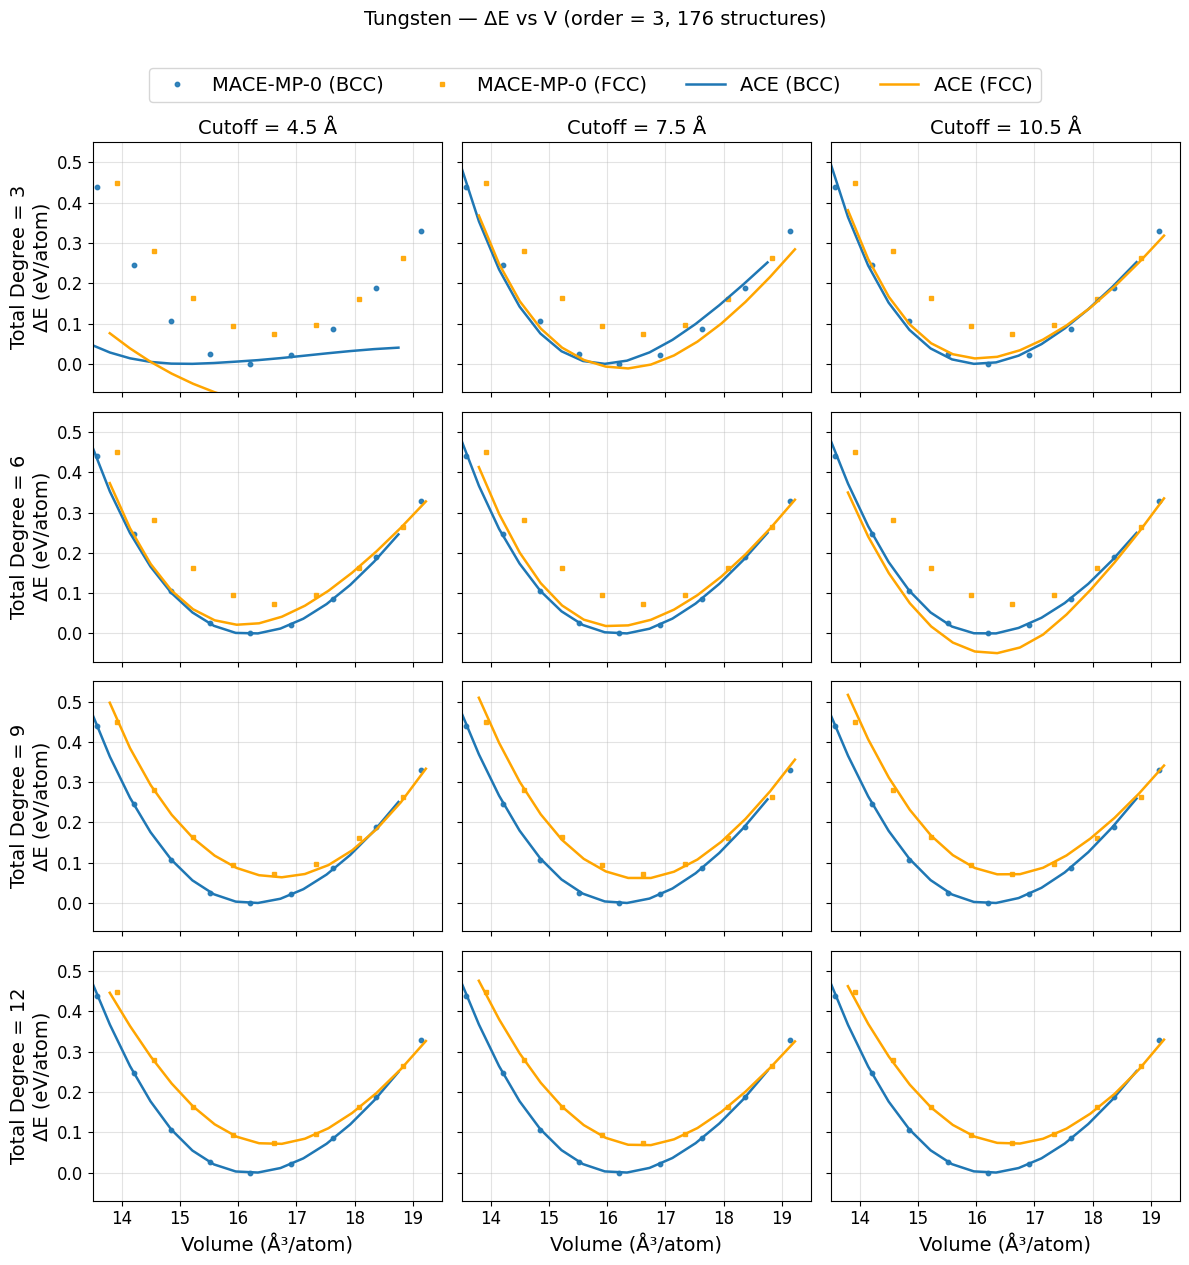

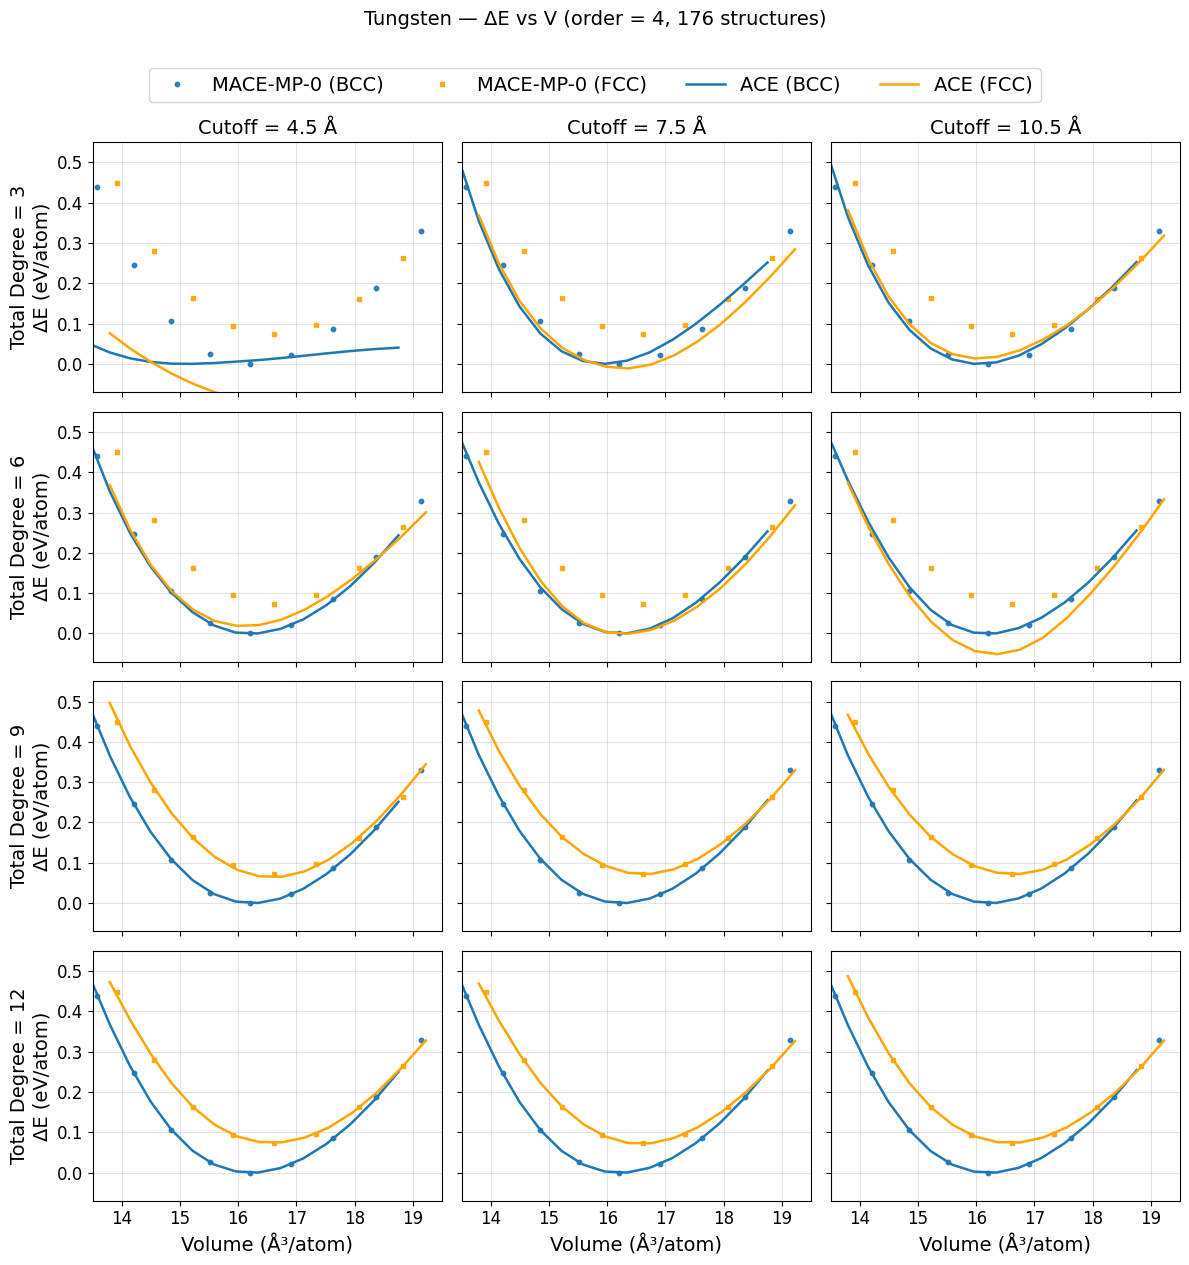

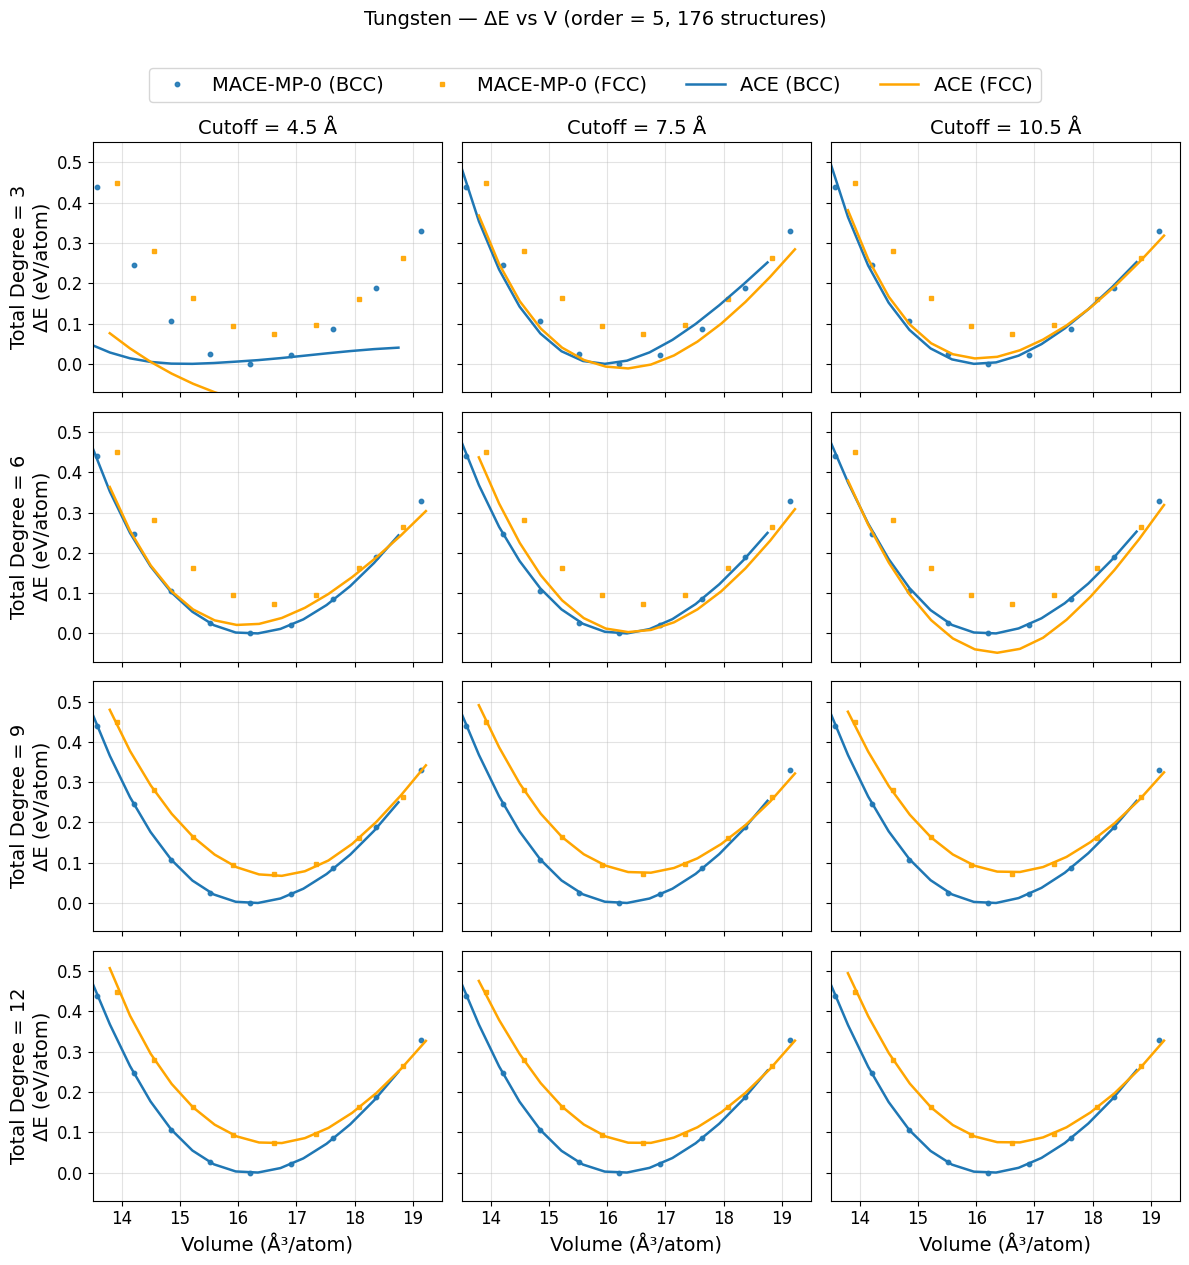

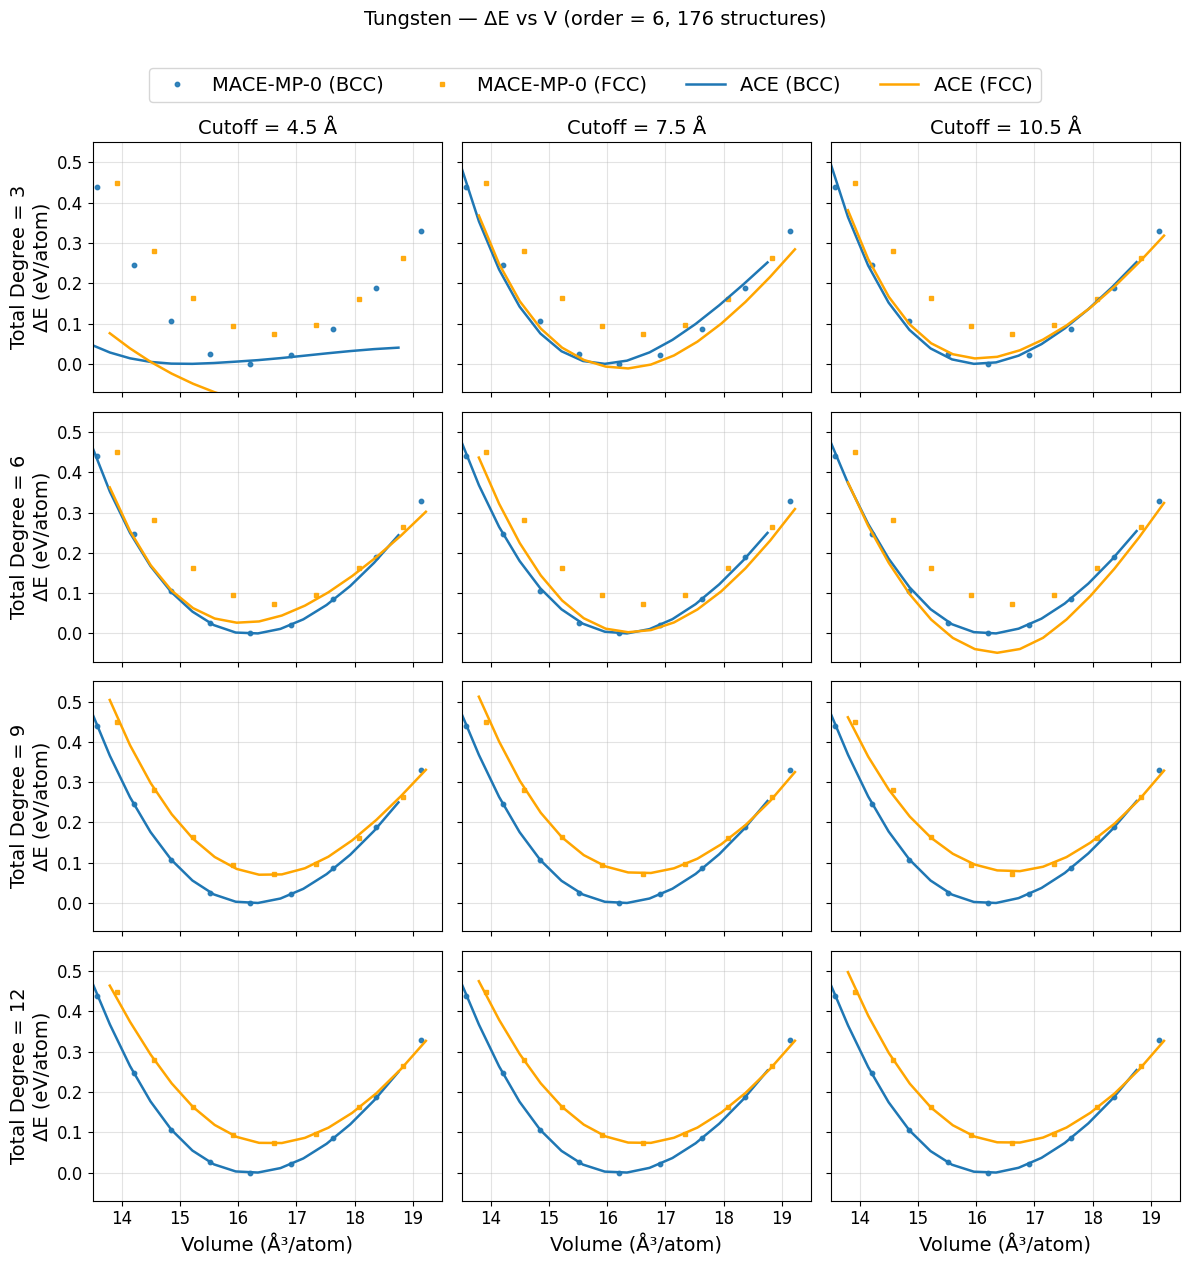

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
base_dir = "E-V curve/results of models on on RVD dataset/m2_delta0.4_176strs"   # folder containing all CSV files

orders        = [3, 4, 5, 6]          # 4 figures
totaldegrees  = [3, 6, 9, 12]         # 4 subplot rows
rcuts         = [4.5, 7.5, 10.5]      # 3 subplot columns

# Filename pattern
student_pattern = (
    "DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m2_delta0.4&of_relaxedvacancy250_withoutLatt3.188_order{order}_totaldegree{totaldegree}_rcut4.5{rcut}.csv"
)

teacher_file = os.path.join("./Structure_generation_methods_data/DeltaE_vs_V_W_MACE_MP_0.csv")

# Line & marker styles
teacher_color_bcc = "tab:blue"
teacher_color_fcc = "orange"
teacher_marker_bcc = "o"
teacher_marker_fcc = "s"
lw_student = 1.8

# -----------------------------
# Load teacher once
# -----------------------------
teacher_df = pd.read_csv(teacher_file)

# -----------------------------
# Generate 4 figures (one per order)
# -----------------------------
for order in orders:
    fig, axes = plt.subplots(
        nrows=len(totaldegrees),
        ncols=len(rcuts),
        figsize=(12, 12),
        sharex=True,
        sharey=True
    )

    max_deltaE = 0.0

    for r_i, td in enumerate(totaldegrees):
        for c_i, rcut in enumerate(rcuts):
            ax = axes[r_i, c_i]

            # --- TEACHER (BCC scatter) ---
            ax.plot(
                teacher_df["V_BCC"], teacher_df["DeltaE_BCC"],
                linestyle="None", marker=teacher_marker_bcc, markersize=3.2,
                color=teacher_color_bcc, alpha=0.9,
                label="MACE-MP-0 (BCC)" if (r_i == 0 and c_i == 0) else None
            )
            # --- TEACHER (FCC scatter) ---
            ax.plot(
                teacher_df["V_FCC"], teacher_df["DeltaE_FCC"],
                linestyle="None", marker=teacher_marker_fcc, markersize=3.2,
                color=teacher_color_fcc, alpha=0.9,
                label="MACE-MP-0 (FCC)" if (r_i == 0 and c_i == 0) else None
            )

            # --- STUDENT CURVE ---
            student_path = os.path.join(
                base_dir, f"DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m2_delta0.4&of_relaxedvacancy250_withoutLatt3.188_order{order}_totaldegree{td}_rcut{rcut}.csv"
            )

            if not os.path.exists(student_path):
                ax.text(0.5, 0.5, "Missing file", ha="center", va="center",
                        transform=ax.transAxes, fontsize=9)
            else:
                df = pd.read_csv(student_path)

                # BCC (blue solid line)
                ax.plot(
                    df["V_BCC"], df["DeltaE_BCC"],
                    linestyle="-", color="tab:blue", linewidth=lw_student,
                    label="ACE (BCC)" if (r_i == 0 and c_i == 0) else None
                )

                # FCC (orange solid line)
                ax.plot(
                    df["V_FCC"], df["DeltaE_FCC"],
                    linestyle="-", color="orange", linewidth=lw_student,
                    label="ACE (FCC)" if (r_i == 0 and c_i == 0) else None
                )

                # track maximum ΔE for uniform y-limits
                max_deltaE = max(
                    max_deltaE,
                    df["DeltaE_BCC"].max(),
                    df["DeltaE_FCC"].max(),
                    teacher_df["DeltaE_BCC"].max(),
                    teacher_df["DeltaE_FCC"].max()
                )

            # cosmetics
            ax.grid(True, alpha=0.35)

            if r_i == 0:
                ax.set_title(f"Cutoff = {rcut} Å", fontsize=14)
            if c_i == 0:
                ax.set_ylabel(f"Total Degree = {td}\nΔE (eV/atom)", fontsize=14)
            if r_i == len(totaldegrees) - 1:
                ax.set_xlabel("Volume (Å³/atom)", fontsize=14)

    # uniform axes
    x_min = min(teacher_df["V_BCC"].min(), teacher_df["V_FCC"].min())
    x_max = max(teacher_df["V_BCC"].max(), teacher_df["V_FCC"].max())
    for ax in fig.axes:
        #ax.set_xlim(x_min, x_max)
        ax.set_xlim(13.5, 19.5)
        #ax.set_ylim(-0.05, max_deltaE * 1.1 if max_deltaE > 0 else 1.0)
        ax.set_ylim(-0.07, 0.55)
        ax.tick_params(axis='both', which='major', labelsize=12)

    # shared legend
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.01), fontsize=14)


    # title + layout
    fig.suptitle(f"Tungsten — ΔE vs V (order = {order}, 176 structures)", fontsize=14, y=1.05)
    plt.tight_layout()

    # save
    out_path = os.path.join(base_dir, f"DeltaE_V_W_order{order}.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()


#### Figures A8-A11 352 Structures

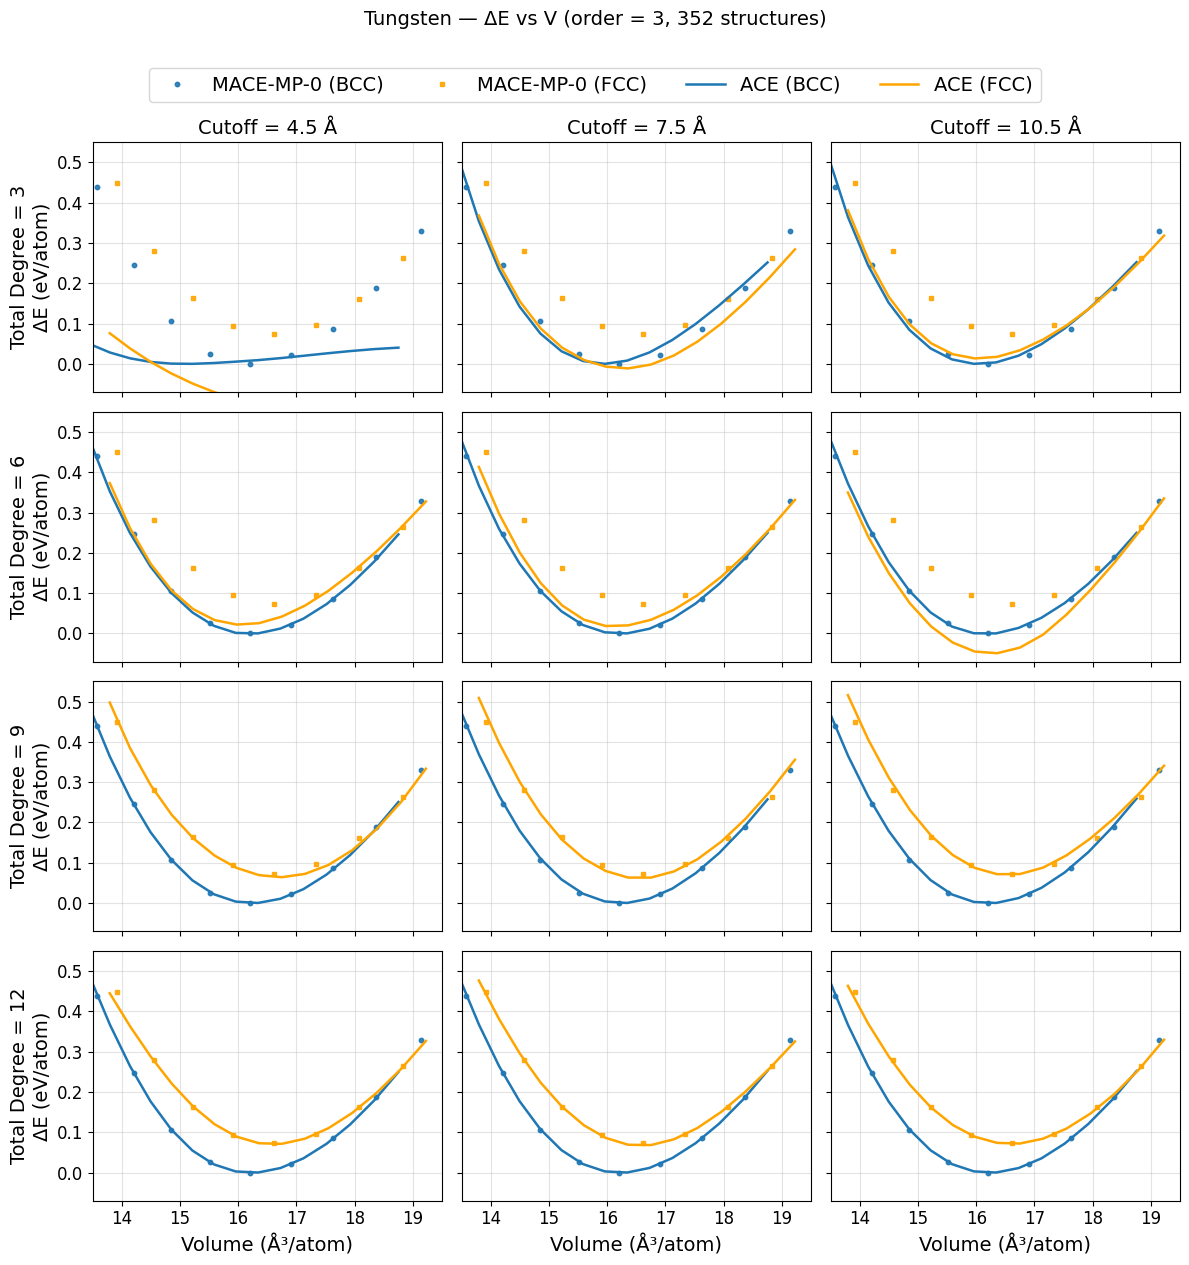

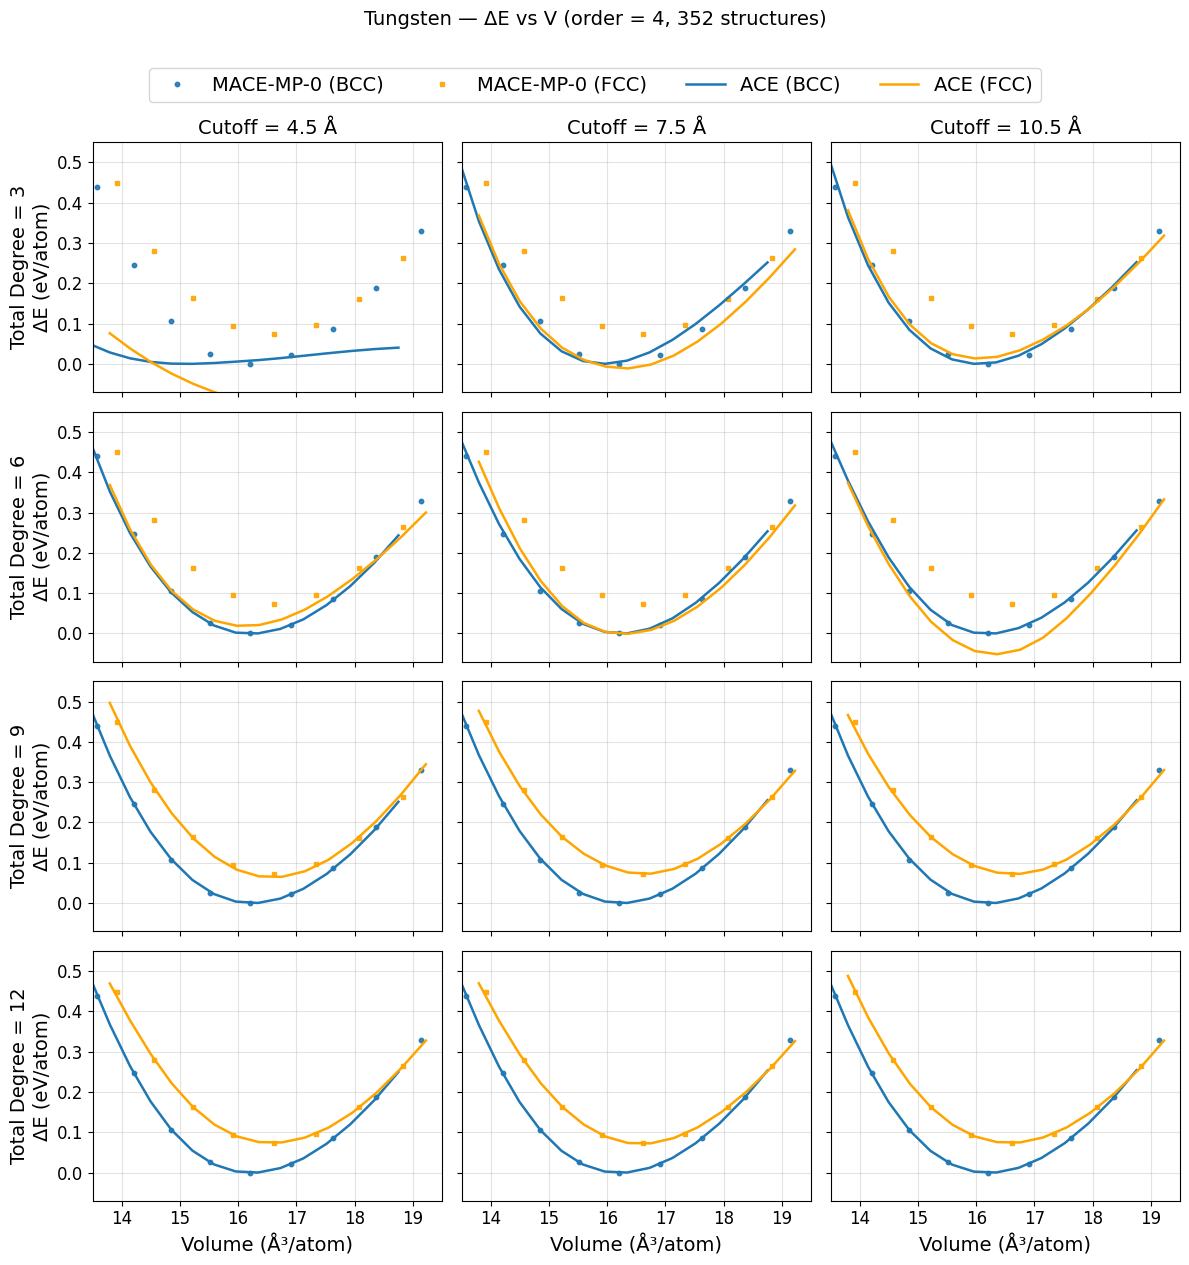

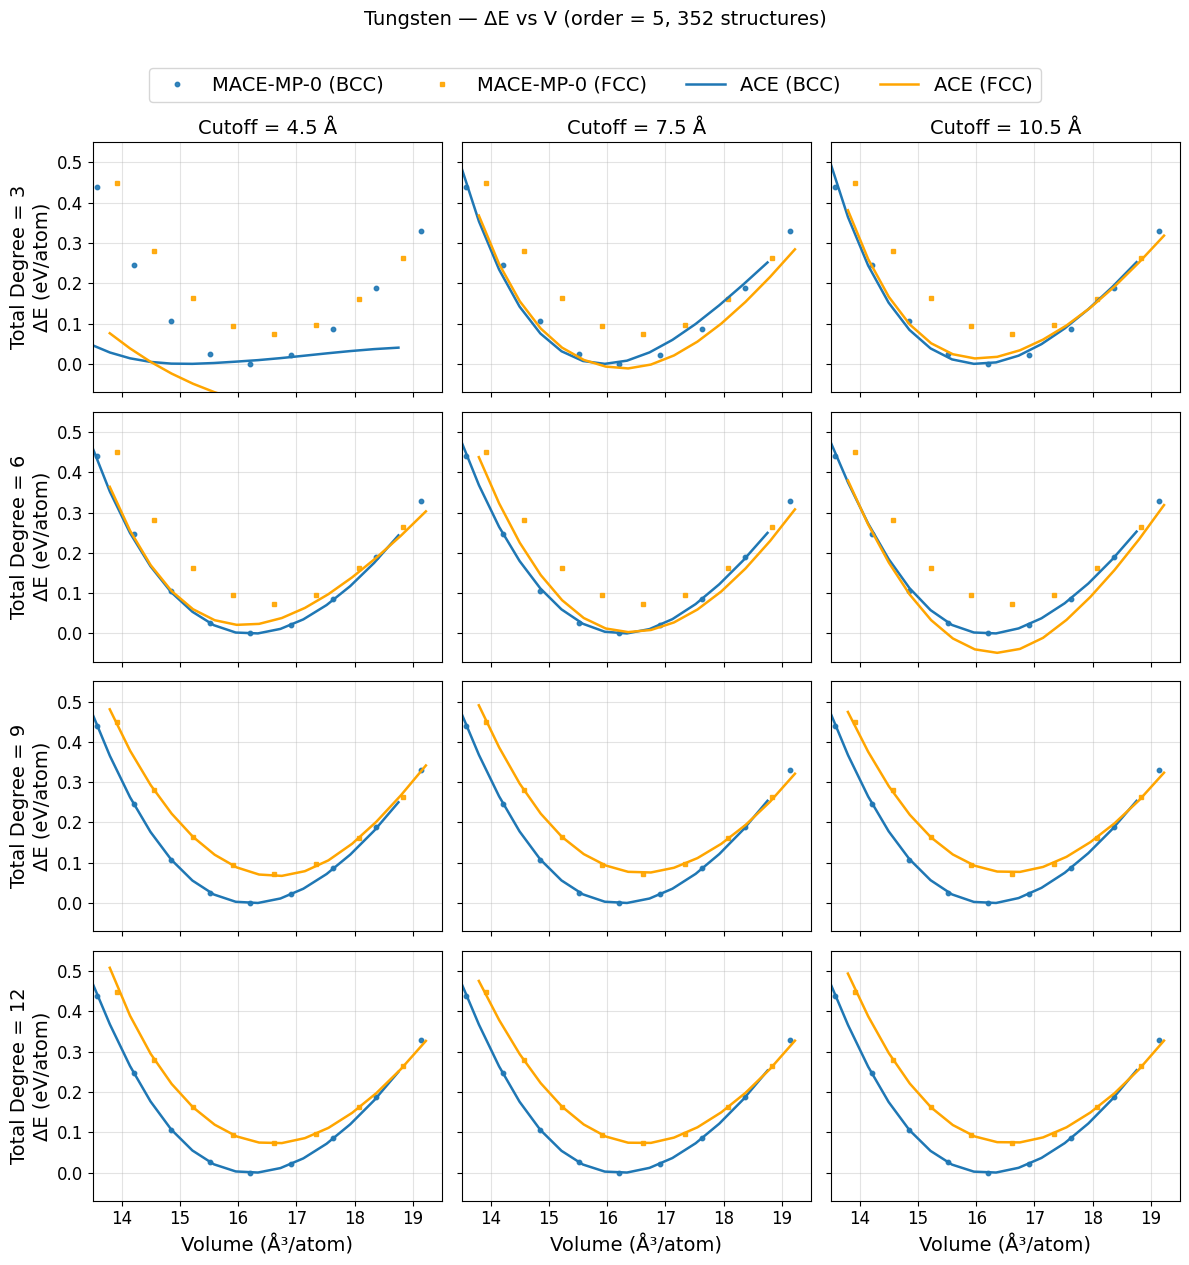

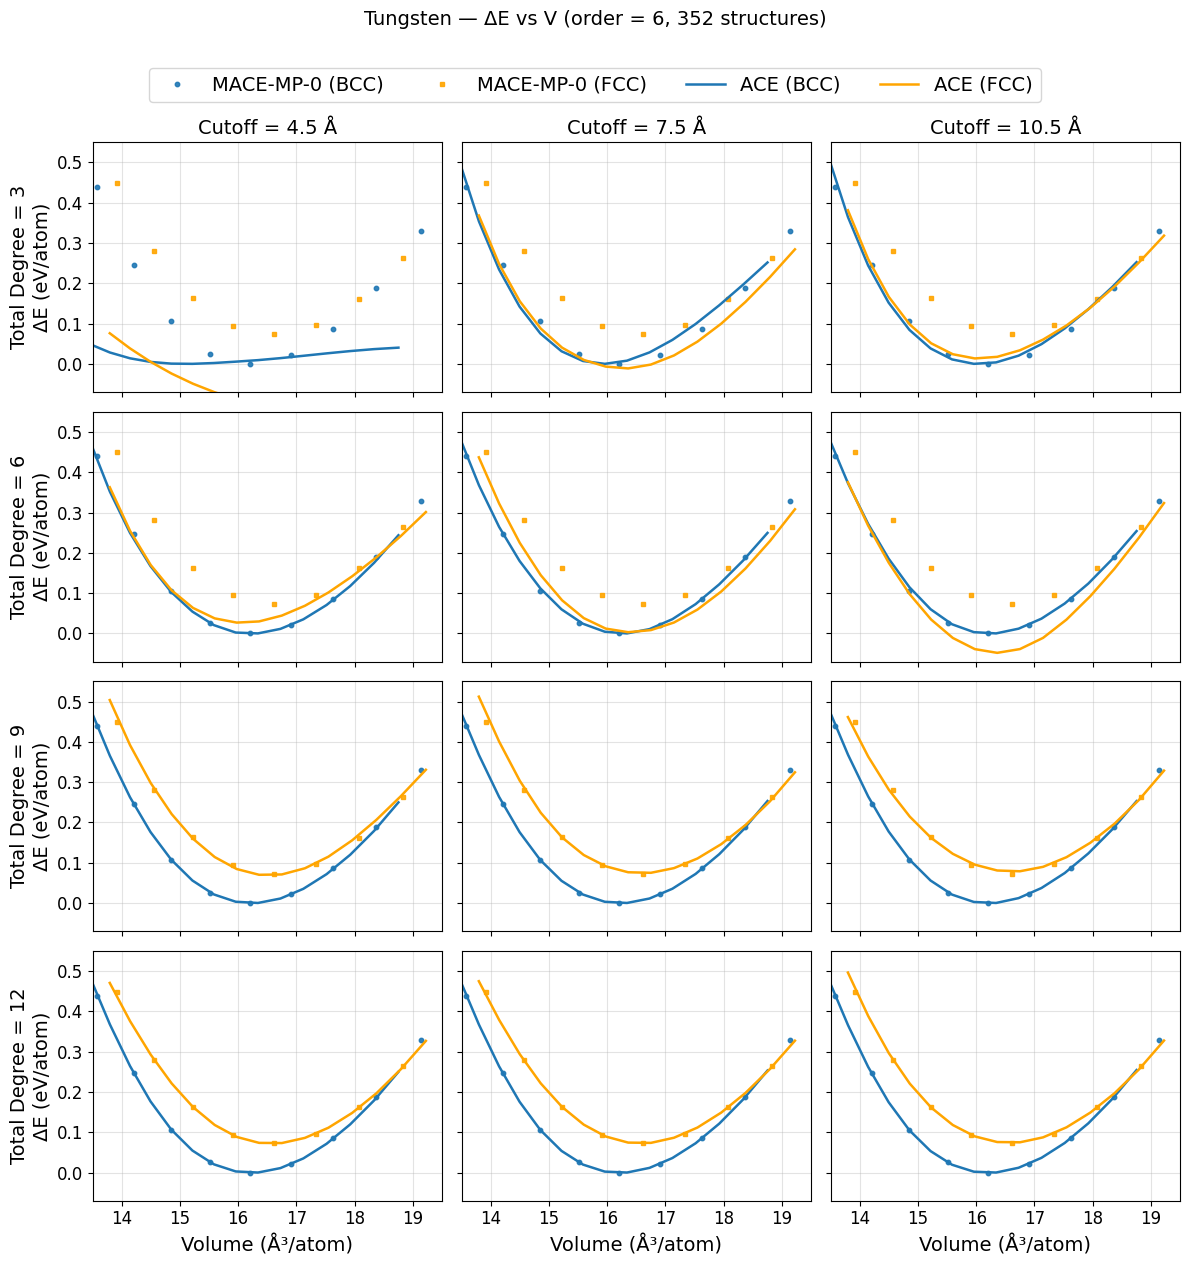

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
base_dir = "E-V curve/results of models on on RVD dataset/m4_delta0.4_352strs"   # folder containing all CSV files

orders        = [3, 4, 5, 6]          # 4 figures
totaldegrees  = [3, 6, 9, 12]         # 4 subplot rows
rcuts         = [4.5, 7.5, 10.5]      # 3 subplot columns

# Filename pattern
student_pattern = (
    "DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m4_delta0.4&of_relaxedvacancy250_withoutLatt3.188_order{order}_totaldegree{totaldegree}_rcut4.5{rcut}.csv"
)

teacher_file = os.path.join("./Structure_generation_methods_data/DeltaE_vs_V_W_MACE_MP_0.csv")

# Line & marker styles
teacher_color_bcc = "tab:blue"
teacher_color_fcc = "orange"
teacher_marker_bcc = "o"
teacher_marker_fcc = "s"
lw_student = 1.8

# -----------------------------
# Load teacher once
# -----------------------------
teacher_df = pd.read_csv(teacher_file)

# -----------------------------
# Generate 4 figures (one per order)
# -----------------------------
for order in orders:
    fig, axes = plt.subplots(
        nrows=len(totaldegrees),
        ncols=len(rcuts),
        figsize=(12, 12),
        sharex=True,
        sharey=True
    )

    max_deltaE = 0.0

    for r_i, td in enumerate(totaldegrees):
        for c_i, rcut in enumerate(rcuts):
            ax = axes[r_i, c_i]

            # --- TEACHER (BCC scatter) ---
            ax.plot(
                teacher_df["V_BCC"], teacher_df["DeltaE_BCC"],
                linestyle="None", marker=teacher_marker_bcc, markersize=3.2,
                color=teacher_color_bcc, alpha=0.9,
                label="MACE-MP-0 (BCC)" if (r_i == 0 and c_i == 0) else None
            )
            # --- TEACHER (FCC scatter) ---
            ax.plot(
                teacher_df["V_FCC"], teacher_df["DeltaE_FCC"],
                linestyle="None", marker=teacher_marker_fcc, markersize=3.2,
                color=teacher_color_fcc, alpha=0.9,
                label="MACE-MP-0 (FCC)" if (r_i == 0 and c_i == 0) else None
            )

            # --- STUDENT CURVE ---
            student_path = os.path.join(
                base_dir, f"DeltaE_V_W_W_random_disp_aug_of_evwindowbccfcc_m4_delta0.4&of_relaxedvacancy250_withoutLatt3.188_order{order}_totaldegree{td}_rcut{rcut}.csv"
            )

            if not os.path.exists(student_path):
                ax.text(0.5, 0.5, "Missing file", ha="center", va="center",
                        transform=ax.transAxes, fontsize=9)
            else:
                df = pd.read_csv(student_path)

                # BCC (blue solid line)
                ax.plot(
                    df["V_BCC"], df["DeltaE_BCC"],
                    linestyle="-", color="tab:blue", linewidth=lw_student,
                    label="ACE (BCC)" if (r_i == 0 and c_i == 0) else None
                )

                # FCC (orange solid line)
                ax.plot(
                    df["V_FCC"], df["DeltaE_FCC"],
                    linestyle="-", color="orange", linewidth=lw_student,
                    label="ACE (FCC)" if (r_i == 0 and c_i == 0) else None
                )

                # track maximum ΔE for uniform y-limits
                max_deltaE = max(
                    max_deltaE,
                    df["DeltaE_BCC"].max(),
                    df["DeltaE_FCC"].max(),
                    teacher_df["DeltaE_BCC"].max(),
                    teacher_df["DeltaE_FCC"].max()
                )

            # cosmetics
            ax.grid(True, alpha=0.35)

            if r_i == 0:
                ax.set_title(f"Cutoff = {rcut} Å", fontsize=14)
            if c_i == 0:
                ax.set_ylabel(f"Total Degree = {td}\nΔE (eV/atom)", fontsize=14)
            if r_i == len(totaldegrees) - 1:
                ax.set_xlabel("Volume (Å³/atom)", fontsize=14)

    # uniform axes
    x_min = min(teacher_df["V_BCC"].min(), teacher_df["V_FCC"].min())
    x_max = max(teacher_df["V_BCC"].max(), teacher_df["V_FCC"].max())
    for ax in fig.axes:
        #ax.set_xlim(x_min, x_max)
        ax.set_xlim(13.5, 19.5)
        #ax.set_ylim(-0.05, max_deltaE * 1.1 if max_deltaE > 0 else 1.0)
        ax.set_ylim(-0.07, 0.55)
        ax.tick_params(axis='both', which='major', labelsize=12)

    # shared legend
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.01), fontsize=14)


    # title + layout
    fig.suptitle(f"Tungsten — ΔE vs V (order = {order}, 352 structures)", fontsize=14, y=1.05)
    plt.tight_layout()

    # save
    out_path = os.path.join(base_dir, f"DeltaE_V_W_order{order}.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()


### Cubic elastic constants

#### Figure 5.6 (C11)

/tmp/ipython-input-4260865529.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


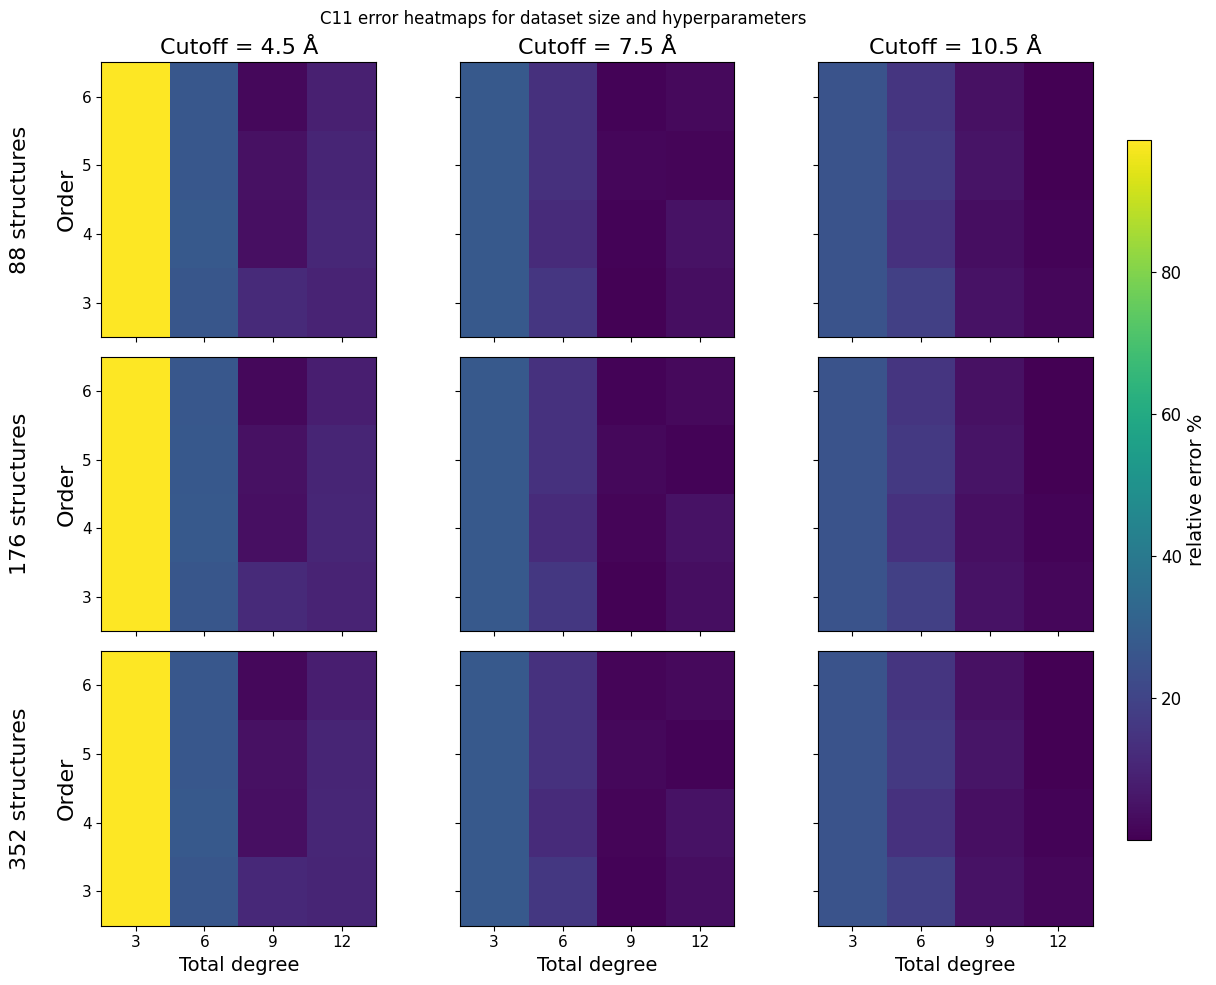

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_88  = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_88structures.csv")
df_176 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_176structures.csv")
df_352 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_352structures.csv")

ref_C11 = 325.0 # MACE-MP-0 reference value
datasets = {"88": df_88, "176": df_176, "352": df_352}
cutoffs = [4.5, 7.5, 10.5]

for df in datasets.values():
    df["err"] = np.abs(df["C11"] - ref_C11) / ref_C11 * 100.0  # (%)

orders  = sorted(df_88["order"].unique())
degrees = sorted(df_88["totaldegree"].unique())

fig, axes = plt.subplots(3, 3, figsize=(12,10), sharex=True, sharey=True)
vmin = min(df["err"].min() for df in datasets.values())
vmax = max(df["err"].max() for df in datasets.values())

for row, (title, df) in enumerate(datasets.items()):
    for col, rcut in enumerate(cutoffs):
        ax = axes[row][col]
        pivot = df[df["rcut"] == rcut].pivot(index="order", columns="totaldegree", values="err")
        im = ax.imshow(pivot.values, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)

        if row == 0:
            ax.set_title(f"Cutoff = {rcut} Å", fontsize=16)
        if col == 0:
            ax.set_ylabel(f"{title} structures\n\nOrder", fontsize=16)
        if row == 2:
            ax.set_xlabel("Total degree", fontsize=14)

        ax.set_xticks(range(len(degrees)))
        ax.set_xticklabels(degrees)
        ax.set_yticks(range(len(orders)))
        ax.set_yticklabels(orders)
        ax.tick_params(labelsize=11)


from mpl_toolkits.axes_grid1 import make_axes_locatable

cbar_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("relative error %", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.suptitle("C11 error heatmaps for dataset size and hyperparameters")
plt.tight_layout()
plt.savefig("./Hyperparameter_and_dataset_size_effects/C11_error_heatmaps.png", dpi=300, bbox_inches="tight")
plt.show()




#### Figure 5.7 (C12)

/tmp/ipython-input-3299243700.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


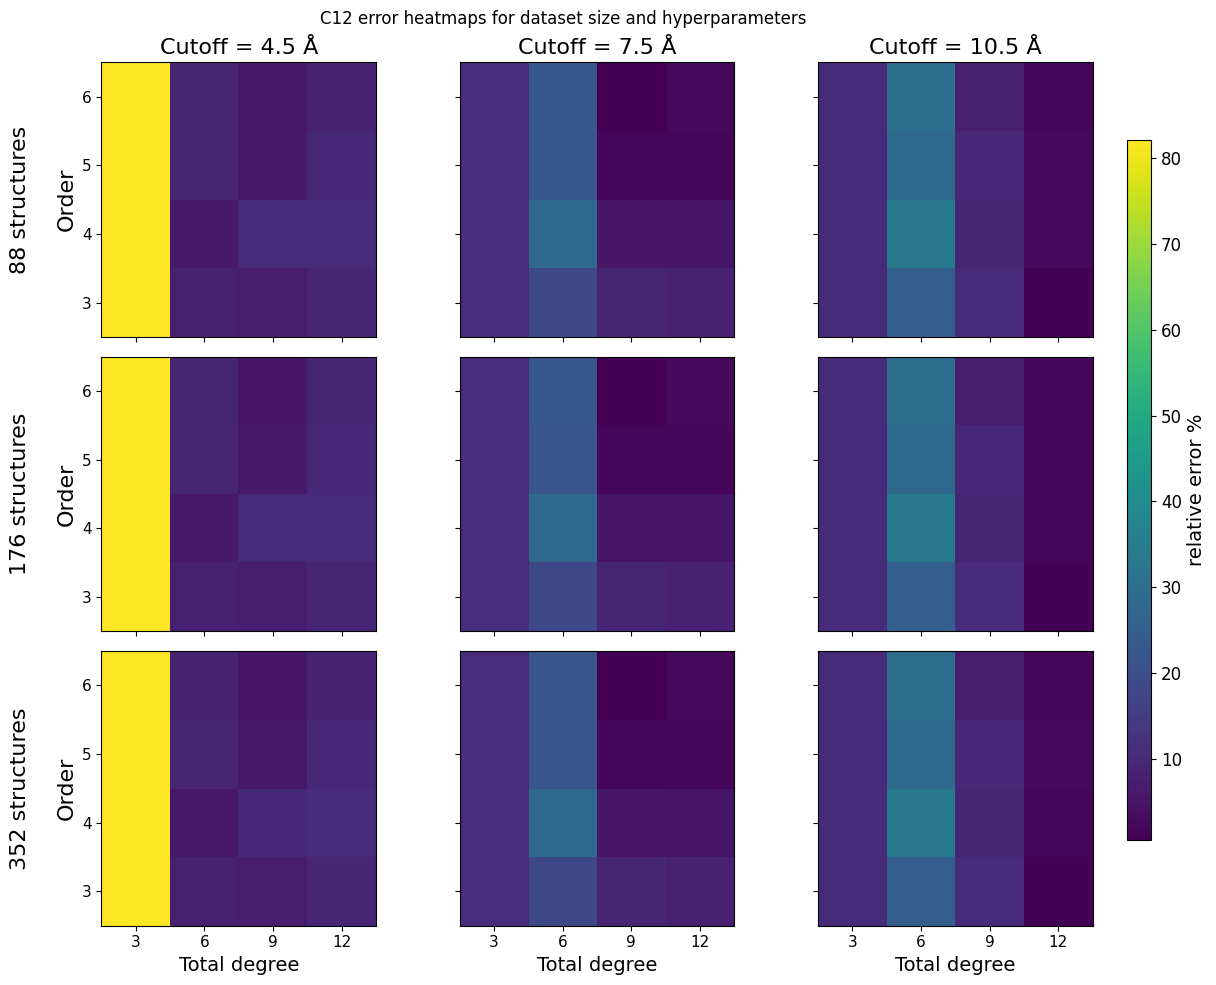

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_88  = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_88structures.csv")
df_176 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_176structures.csv")
df_352 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_352structures.csv")

ref_C12 = 217.0 # MACE-MP-0 reference value
datasets = {"88": df_88, "176": df_176, "352": df_352}
cutoffs = [4.5, 7.5, 10.5]

for df in datasets.values():
    df["err"] = np.abs(df["C12"] - ref_C12) / ref_C12 * 100.0  # (%)

orders  = sorted(df_88["order"].unique())
degrees = sorted(df_88["totaldegree"].unique())

fig, axes = plt.subplots(3, 3, figsize=(12,10), sharex=True, sharey=True)
vmin = min(df["err"].min() for df in datasets.values())
vmax = max(df["err"].max() for df in datasets.values())

for row, (title, df) in enumerate(datasets.items()):
    for col, rcut in enumerate(cutoffs):
        ax = axes[row][col]
        pivot = df[df["rcut"] == rcut].pivot(index="order", columns="totaldegree", values="err")
        im = ax.imshow(pivot.values, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)

        if row == 0:
            ax.set_title(f"Cutoff = {rcut} Å", fontsize=16)
        if col == 0:
            ax.set_ylabel(f"{title} structures\n\nOrder", fontsize=16)
        if row == 2:
            ax.set_xlabel("Total degree", fontsize=14)

        ax.set_xticks(range(len(degrees)))
        ax.set_xticklabels(degrees)
        ax.set_yticks(range(len(orders)))
        ax.set_yticklabels(orders)
        ax.tick_params(labelsize=11)


from mpl_toolkits.axes_grid1 import make_axes_locatable

cbar_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("relative error %", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.suptitle("C12 error heatmaps for dataset size and hyperparameters")
plt.tight_layout()
plt.savefig("./Hyperparameter_and_dataset_size_effects/C12_error_heatmaps.png", dpi=300, bbox_inches="tight")
plt.show()




#### Figure 5.8 (C44)

/tmp/ipython-input-2030586096.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


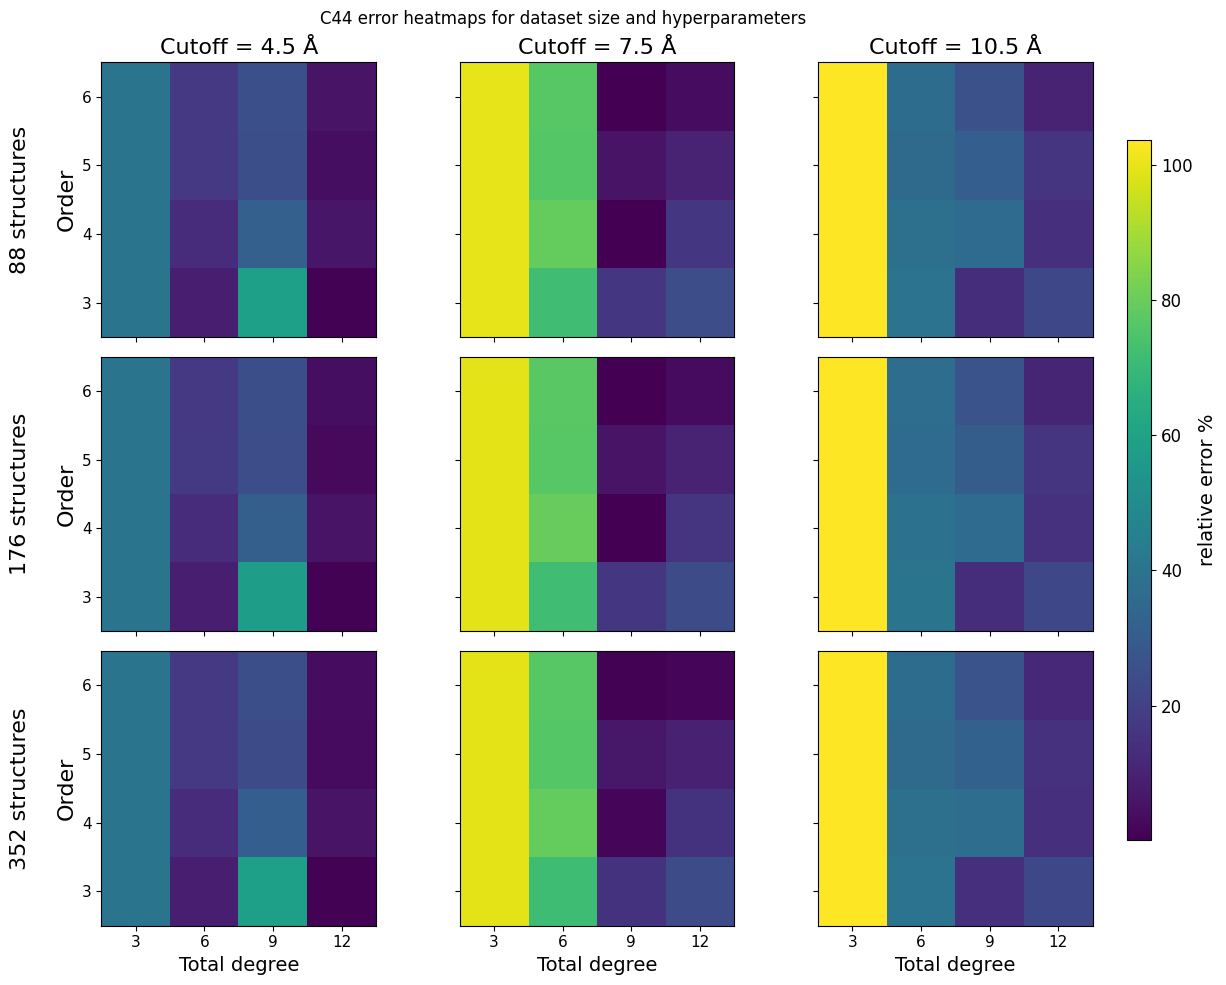

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_88  = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_88structures.csv")
df_176 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_176structures.csv")
df_352 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Cubic_elastic_constants_RVD_352structures.csv")

ref_C44 = 77.0# MACE-MP-0 reference value
datasets = {"88": df_88, "176": df_176, "352": df_352}
cutoffs = [4.5, 7.5, 10.5]

for df in datasets.values():
    df["err"] = np.abs(df["C44"] - ref_C44) / ref_C44 * 100.0  # (%)

orders  = sorted(df_88["order"].unique())
degrees = sorted(df_88["totaldegree"].unique())

fig, axes = plt.subplots(3, 3, figsize=(12,10), sharex=True, sharey=True)
vmin = min(df["err"].min() for df in datasets.values())
vmax = max(df["err"].max() for df in datasets.values())

for row, (title, df) in enumerate(datasets.items()):
    for col, rcut in enumerate(cutoffs):
        ax = axes[row][col]
        pivot = df[df["rcut"] == rcut].pivot(index="order", columns="totaldegree", values="err")
        im = ax.imshow(pivot.values, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)

        if row == 0:
            ax.set_title(f"Cutoff = {rcut} Å", fontsize=16)
        if col == 0:
            ax.set_ylabel(f"{title} structures\n\nOrder", fontsize=16)
        if row == 2:
            ax.set_xlabel("Total degree", fontsize=14)

        ax.set_xticks(range(len(degrees)))
        ax.set_xticklabels(degrees)
        ax.set_yticks(range(len(orders)))
        ax.set_yticklabels(orders)
        ax.tick_params(labelsize=11)


from mpl_toolkits.axes_grid1 import make_axes_locatable

cbar_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("relative error %", fontsize=14)     # label font size
cbar.ax.tick_params(labelsize=12)

plt.suptitle("C44 error heatmaps for dataset size and hyperparameters")
plt.tight_layout()
plt.savefig("./Hyperparameter_and_dataset_size_effects/C44_error_heatmaps.png", dpi=300, bbox_inches="tight")
plt.show()




### Figure 5.9 (Vacancy formation energy)

/tmp/ipython-input-3586116232.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


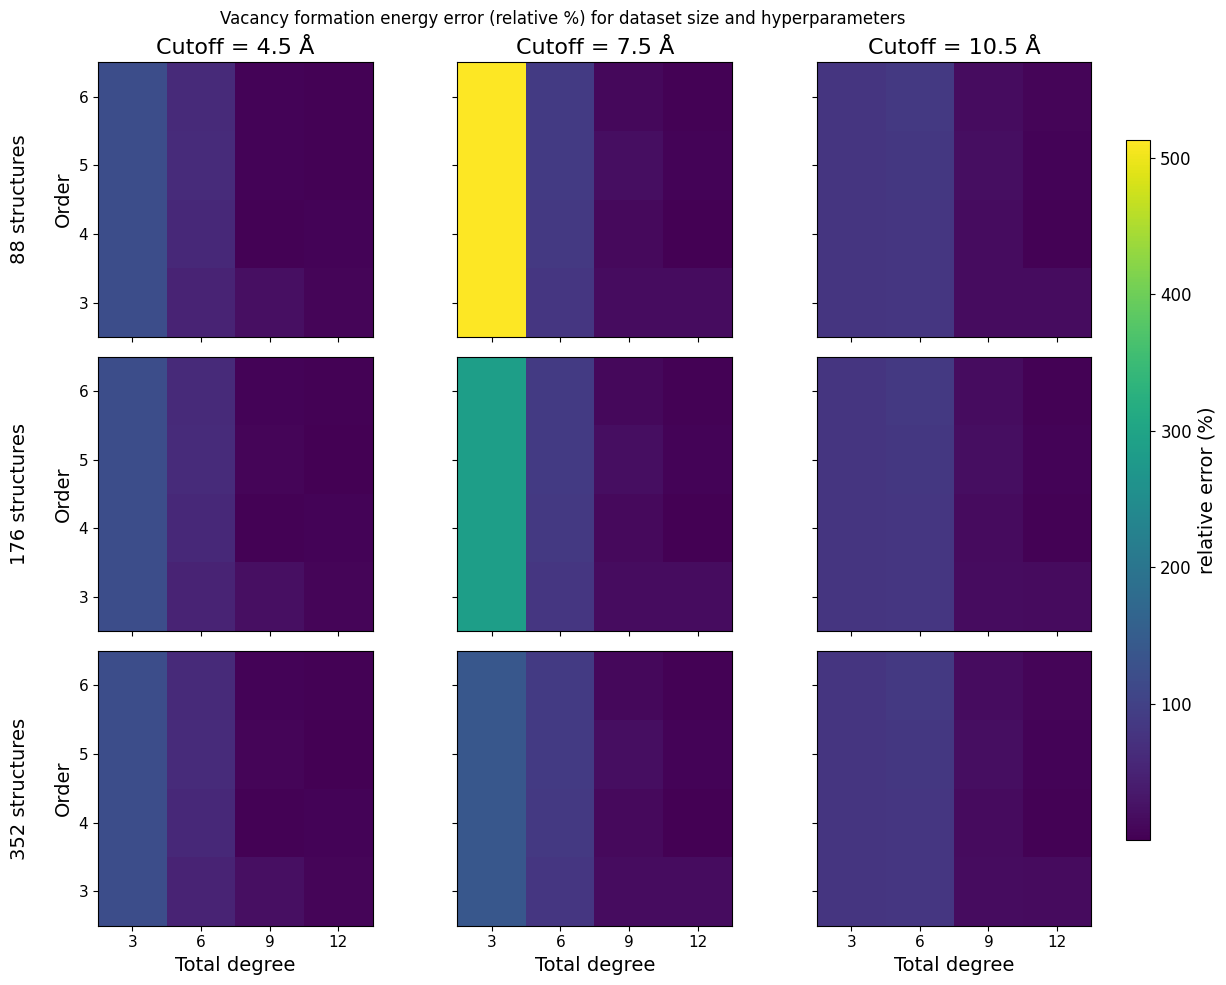

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Load the datasets
# ============================
df_88  = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Vacancy_formation_energy_RVD_88structures.csv")
df_176 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Vacancy_formation_energy_RVD_176structures.csv")
df_352 = pd.read_csv("./Hyperparameter_and_dataset_size_effects/Vacancy_formation_energy_RVD_352structures.csv")

# ============================
# Settings
# ============================
Evac_ref = 2.655  # MACE-MP-0 reference value (in eV)
datasets = {"88": df_88, "176": df_176, "352": df_352}
cutoffs = [4.5, 7.5, 10.5]

# Compute relative (%) error
for df in datasets.values():
    df["err"] = np.abs(df["Vacancy formation energy"] - Evac_ref) / Evac_ref * 100.0

orders  = sorted(df_88["order"].unique())
degrees = sorted(df_88["totaldegree"].unique())

# ============================
# Create 3x3 heatmaps
# ============================
fig, axes = plt.subplots(3, 3, figsize=(12,10), sharex=True, sharey=True)

vmin = min(df["err"].min() for df in datasets.values())
vmax = max(df["err"].max() for df in datasets.values())

for row, (title, df) in enumerate(datasets.items()):
    for col, rcut in enumerate(cutoffs):
        ax = axes[row][col]
        pivot = df[df["rcut"] == rcut].pivot(index="order", columns="totaldegree", values="err")
        im = ax.imshow(pivot.values, cmap="viridis", origin="lower", vmin=vmin, vmax=vmax)

        if row == 0:
            ax.set_title(f"Cutoff = {rcut} Å", fontsize=16)
        if col == 0:
            ax.set_ylabel(f"{title} structures\n\nOrder", fontsize=14)
        if row == 2:
            ax.set_xlabel("Total degree", fontsize=14)

        ax.set_xticks(range(len(degrees)))
        ax.set_xticklabels(degrees)
        ax.set_yticks(range(len(orders)))
        ax.set_yticklabels(orders)
        ax.tick_params(labelsize=11)

# Shared colorbar
cbar_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("relative error (%)", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.suptitle("Vacancy formation energy error (relative %) for dataset size and hyperparameters")
plt.tight_layout()
plt.savefig("./Hyperparameter_and_dataset_size_effects/Vacancy_formation_energy_error_heatmaps.png", dpi=300, bbox_inches="tight")
plt.show()


 # Generalization on Mo and Nb

## Table 5.3 (Lattice constant)

Model Lattice Constant (Å)

                        Mo        Nb
_______
        DFT           3.163     3.322

      MACE MP0        3.170     3.313

    ACE-MACE-MP-0     3.170     3.313



## Figure 5.10 (Cubic elastic constants)

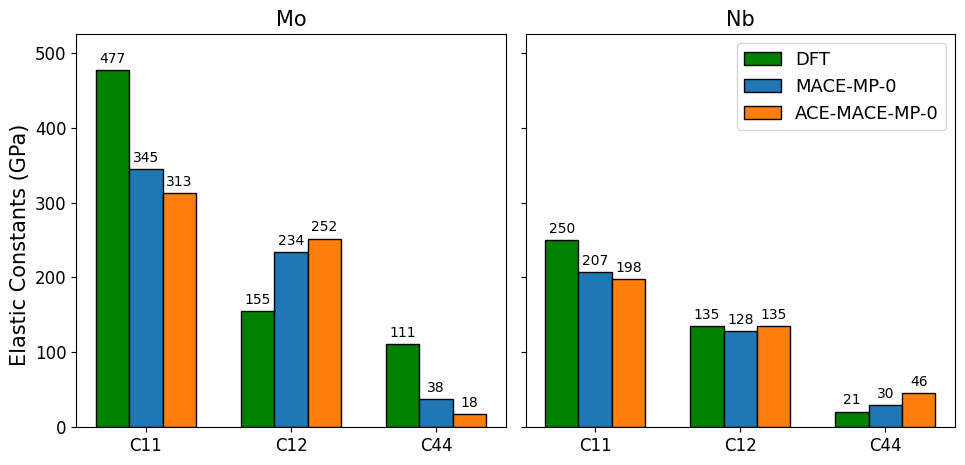

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "ACE-MACE-MP-0"]
constants = ["C11", "C12", "C44"]

# Elastic constants (GPa)
data_Mo = np.array([
    [477.0, 345.0, 313],
    [155.0, 234.0, 252],
    [111.0, 38.0, 18.0],
])

data_Nb = np.array([
    [250.0, 207.0, 198.0],
    [135.0, 128.0, 135.0],
    [21.0, 30.0, 46.0],
])


# Group data in a dict for easy iteration
data_dict = {
    "Mo": data_Mo,
    "Nb": data_Nb
}

# -----------------------------
# Plot Settings
# -----------------------------
x = np.arange(len(constants))
width = 0.23
colors = ["green", "tab:blue", "tab:orange"]

# Compute global max for consistent y-axis
global_max = max(np.max(d) for d in data_dict.values())

# -----------------------------
# Subplots (1 row × 2 columns)
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for ax, (element, data) in zip(axes, data_dict.items()):
    for i, model in enumerate(models):
        ax.bar(x + (i - len(models)/2) * width + width/2,
               data[:, i], width,
               label=model if element == "Nb" else "",
               color=colors[i], edgecolor="black")

    # Axis labels and ticks
    ax.set_xticks(x)
    ax.set_xticklabels(constants, fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(f"{element}", fontsize=15)
    ax.set_ylim(0, global_max * 1.1)

    # Annotate values
    for i in range(len(models)):
        for j in range(len(constants)):
            val = data[j, i]
            xpos = x[j] + (i - len(models)/2) * width + width/2
            ax.annotate(f'{val:.0f}', xy=(xpos, val),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

# Shared labels
fig.text(0.5, 0.04, '', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Elastic Constants (GPa)', va='center', rotation='vertical', fontsize=15)

# Legend loc
axes[-1].legend(fontsize=13, loc='upper right')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig("./Generalization_to_Mo_and_Nb/Elastic_constants_Mo_Nb.png", dpi=300)
plt.show()


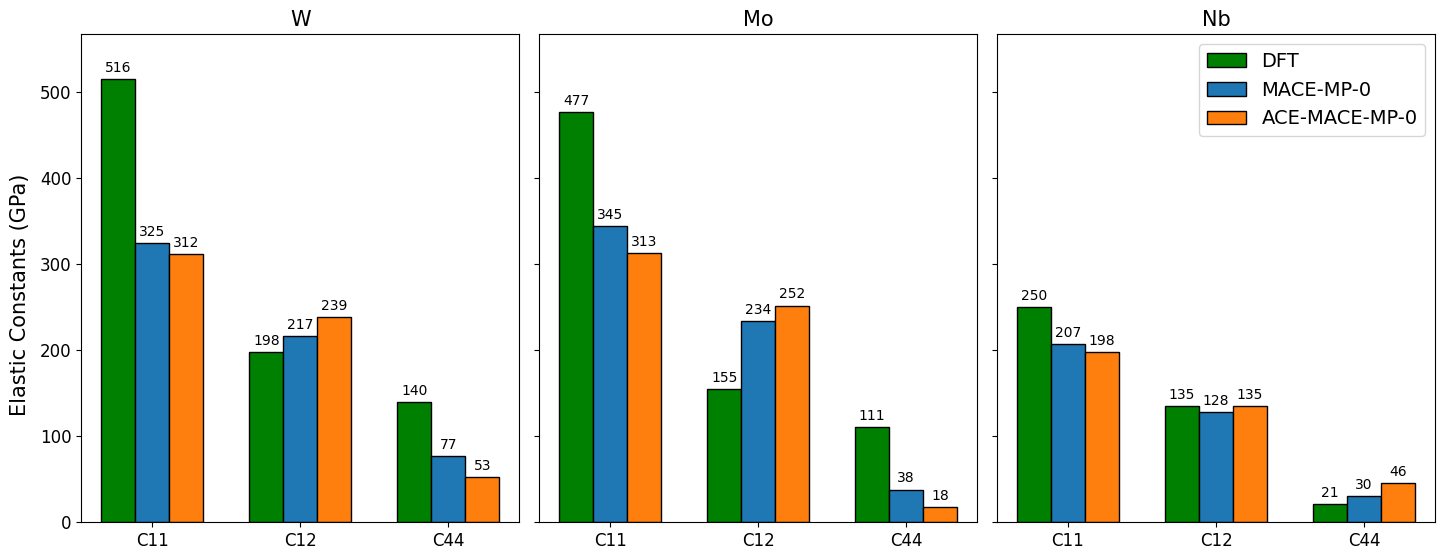

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "ACE-MACE-MP-0"]
constants = ["C11", "C12", "C44"]

# Elastic constants (GPa)
data_W = np.array([
    [516.0, 325.0, 312.0],  # C11
    [198.0, 217.0, 239.0],  # C12
    [140.0, 77.0, 53.0],    # C44
])

data_Mo = np.array([
    [477.0, 345.0, 313],
    [155.0, 234.0, 252],
    [111.0, 38.0, 18.0],
])

data_Nb = np.array([
    [250.0, 207.0, 198.0],
    [135.0, 128.0, 135.0],
    [21.0, 30.0, 46.0],
])

# Group data in a dict for easy iteration
data_dict = {
    "W": data_W,
    "Mo": data_Mo,
    "Nb": data_Nb
}

# -----------------------------
# Plot Settings
# -----------------------------
x = np.arange(len(constants))
width = 0.23
colors = ["green", "tab:blue", "tab:orange"]

# Compute global max to set y-axis properly
global_max = max(np.max(d) for d in data_dict.values())

# -----------------------------
# Subplots (1 row × 3 columns)
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

for ax, (element, data) in zip(axes, data_dict.items()):
    for i, model in enumerate(models):
        ax.bar(x + (i - len(models)/2) * width + width/2,
               data[:, i], width,
               label=model if element == "Nb" else "",  # legend only on last plot
               color=colors[i], edgecolor="black")

    # Axis labels and ticks
    ax.set_xticks(x)
    ax.set_xticklabels(constants, fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(f"{element}", fontsize=15)
    ax.set_ylim(0, global_max * 1.1)  # consistent y-limit across all subplots

    # Annotate values
    for i in range(len(models)):
        for j in range(len(constants)):
            val = data[j, i]
            xpos = x[j] + (i - len(models)/2) * width + width/2
            ax.annotate(f'{val:.0f}', xy=(xpos, val),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

# Shared labels
#fig.text(0.5, 0.04, 'Elastic Constant', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Elastic Constants (GPa)', va='center', rotation='vertical', fontsize=15)

# Legend loc
axes[-1].legend(fontsize=14, loc='upper right')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig("./Generalization_to_Mo_and_Nb/Elastic_constants_W_Mo_Nb.png", dpi=300)
plt.show()


## Figure 5.11 (ΔE-V)

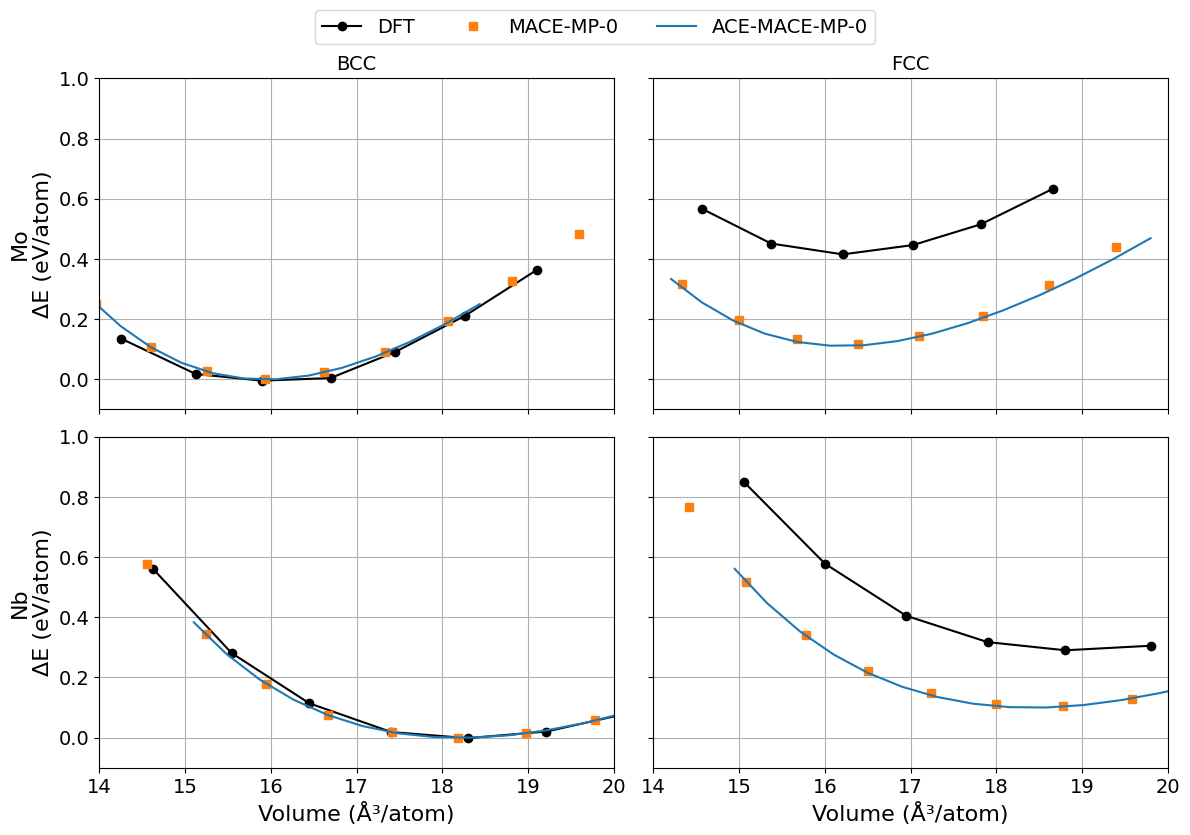

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Settings
# -----------------------------
# --------- Molybdenum ----------
files_Mo = [
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_DFT.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_MACE_MP_0.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_ACE_MACE_MP_0.csv",
]

# --------- Niobium ----------
files_Nb = [
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_DFT.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_MACE_MP_0.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_ACE_MACE_MP_0.csv",
]

elements = ["Mo", "Nb"]
all_files = [files_Mo, files_Nb]

models = ["DFT", "MACE-MP-0", "ACE-MACE-MP-0"]

# Colors
colors = {
    "DFT": "black",
    "MACE-MP-0": "tab:orange",
    "ACE-MACE-MP-0": "tab:blue"
}

# Line/marker rules
linestyles = {
    "DFT": "-",
    "MACE-MP-0": "None",
    "ACE-MACE-MP-0": "-"
}

markers = {
    "DFT": "o",
    "MACE-MP-0": "s",
    "ACE-MACE-MP-0": None
}

# -----------------------------
# Plot layout (2 rows × 2 columns)
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for row, (element, file_set) in enumerate(zip(elements, all_files)):
    for col, phase in enumerate(["BCC", "FCC"]):
        ax = axes[row, col]

        for file, model in zip(file_set, models):
            df = pd.read_csv(file)
            ax.plot(df[f"V_{phase}"], df[f"DeltaE_{phase}"],
                    marker=markers[model],
                    linestyle=linestyles[model],
                    color=colors[model],
                    label=model)

        # Axis formatting
        ax.set_xlim(14, 20)
        ax.set_ylim(-0.1, 1.0)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=14)

        # Titles & labels
        if row == 0:
            ax.set_title(f"{phase}", fontsize=14)
        if col == 0:
            ax.set_ylabel(f"{element}\nΔE (eV/atom)", fontsize=16)
        if row == 1:
            ax.set_xlabel("Volume (Å³/atom)", fontsize=16)

# -----------------------------
# Shared legend and layout
# -----------------------------
fig.legend(models, loc="upper center", ncol=3, fontsize=14, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()
plt.savefig("./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_Nb_BCC_FCC.png", dpi=300, bbox_inches="tight")
plt.show()


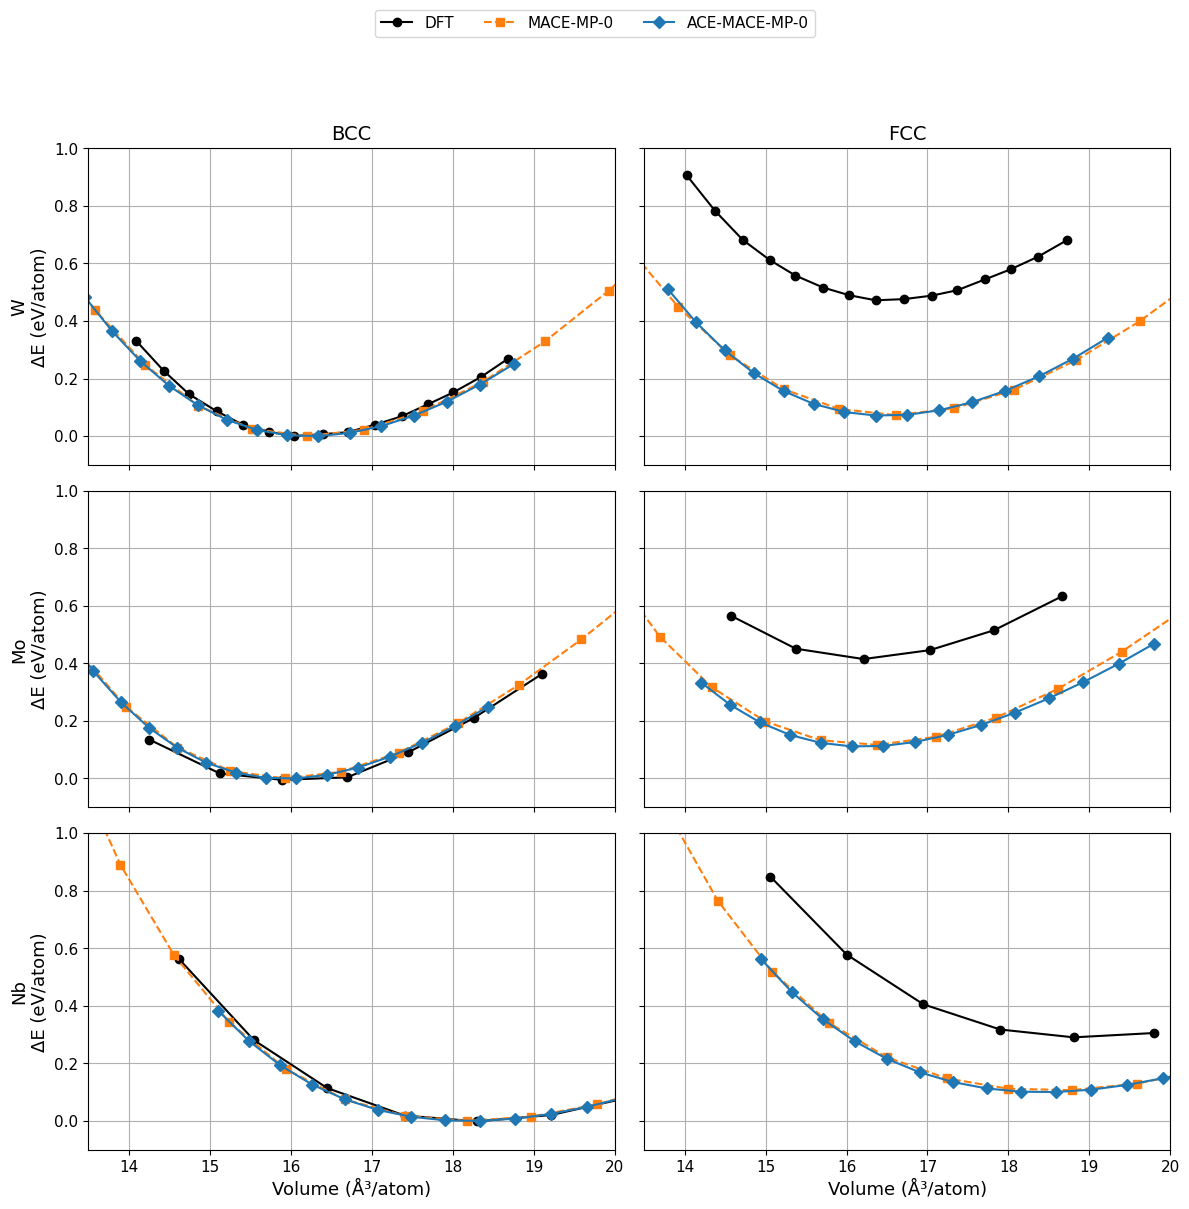

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Settings
# -----------------------------
# --------- Tungsten ----------
files_W = [
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_W_DFT.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_W_MACE_MP_0.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_W_ACE_MACE_MP_0.csv",
]

# --------- Molybdenum ----------
files_Mo = [
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_DFT.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_MACE_MP_0.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Mo_ACE_MACE_MP_0.csv",
]

# --------- Niobium ----------
files_Nb = [
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_DFT.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_MACE_MP_0.csv",
    "./Generalization_to_Mo_and_Nb/DeltaE_vs_V_Nb_ACE_MACE_MP_0.csv",
]

elements = ["W", "Mo", "Nb"]
all_files = [files_W, files_Mo, files_Nb]

models = ["DFT", "MACE-MP-0", "ACE-MACE-MP-0"]

# Colors and line styles
colors = {
    "DFT": "black",
    "MACE-MP-0": "tab:orange",
    "ACE-MACE-MP-0": "tab:blue"
}

linestyles = {
    "DFT": "-",
    "MACE-MP-0": "--",
    "ACE-MACE-MP-0": "-"
}

markers = {
    "DFT": "o",
    "MACE-MP-0": "s",
    "ACE-MACE-MP-0": "D"
}

# -----------------------------
# Plot layout
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)

for row, (element, file_set) in enumerate(zip(elements, all_files)):
    for col, phase in enumerate(["BCC", "FCC"]):
        ax = axes[row, col]

        for file, model in zip(file_set, models):
            df = pd.read_csv(file)
            ax.plot(df[f"V_{phase}"], df[f"DeltaE_{phase}"],
                    marker=markers[model],
                    linestyle=linestyles[model],
                    color=colors[model],
                    label=model)

        # Axis formatting
        ax.set_xlim(13.5, 20)
        ax.set_ylim(-0.1, 1.0)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=14)

        # Titles & labels
        if row == 0:
            ax.set_title(f"{phase}", fontsize=14)
        if col == 0:
            ax.set_ylabel(f"{element}\nΔE (eV/atom)", fontsize=16)
        if row == 2:
            ax.set_xlabel("Volume (Å³/atom)", fontsize=16)

# -----------------------------
# Shared legend and layout
# -----------------------------
fig.legend(models, loc="upper center", ncol=3, fontsize=14, bbox_to_anchor=(0.5, 1.01))
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("./Generalization_to_Mo_and_Nb/DeltaE_vs_V_W_Mo_Nb_BCC_FCC.png", dpi=300)
plt.show()


## Figure 5.12 (Vacancy formation energy)

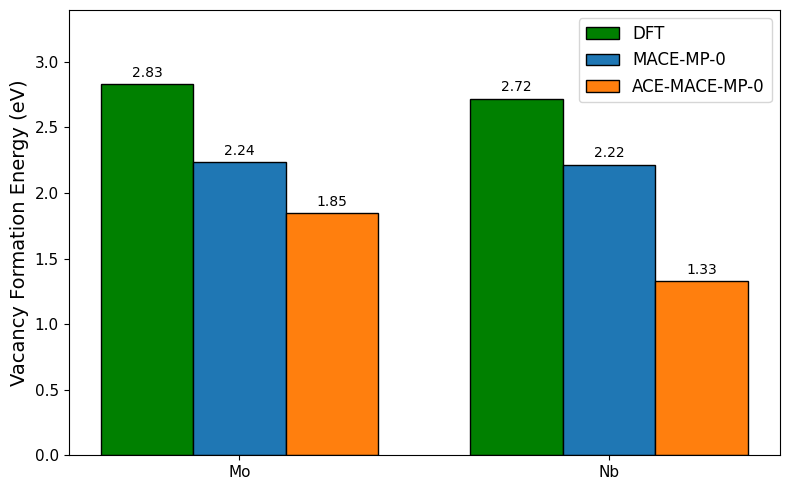

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "ACE-MACE-MP-0"]
elements = ["Mo", "Nb"]

# Vacancy formation energies (eV)
vacancy_energies_mo = [2.83, 2.239, 1.85]
vacancy_energies_nb = [2.72, 2.217, 1.33]

# Combine into numpy array (rows = elements, cols = models)
data = np.array([
    vacancy_energies_mo,
    vacancy_energies_nb
])

# -----------------------------
# Plot Settings
# -----------------------------
x = np.arange(len(elements))
width = 0.25
colors = ["green", "tab:blue", "tab:orange"]

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 5))

for i, model in enumerate(models):
    ax.bar(x + (i - len(models)/2)*width + width/2,
           data[:, i],
           width,
           label=model,
           color=colors[i],
           edgecolor="black")

# Axis labels and ticks
ax.set_ylabel("Vacancy Formation Energy (eV)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(elements, fontsize=13)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_ylim(0, np.max(data) * 1.2)

# Annotate values on bars
for i in range(len(models)):
    for j in range(len(elements)):
        val = data[j, i]
        xpos = x[j] + (i - len(models)/2)*width + width/2
        ax.annotate(f'{val:.2f}',
                    xy=(xpos, val),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Legend and layout
ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig("./Generalization_to_Mo_and_Nb/vacancy_formation_energy_Mo_Nb.png", dpi=300)
plt.show()
